In [16]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#this line causes errors when running as a .py script
get_ipython().magic(u'matplotlib inline')
matplotlib.style.use('ggplot')
pd.options.display.max_rows = 40
#pd.options.display.max_colwidth = 200
pd.options.display.show_dimensions = True

In [135]:
def line_graph(field_df, title=None, size=(20,10), ylim=None, x=np.arange(2004,2017)):
    """size is a tuple of width x height, ylim is a tuple of min x max"""
    plt.figure(figsize=size)
    color_list = ["purple", "blue", "orange", "yellow", "green", "grey", "black", "white", "red"]
    if ylim:
        plt.ylim=ylim
    field_list = list(field_df.columns.ravel())
    patch_list = []
#    w_patch = mpatches.Patch(color="green", label="white")
    for field in field_list:
        color_index = field_list.index(field)
        plt.plot(x, field_df[field], color=color_list[color_index]) 
        field_patch = mpatches.Patch(color=color_list[color_index], label=field)
        patch_list.append(field_patch)
    plt.legend(handles=patch_list)
    plt.title(title)
        
def tabular_lines(y_dict, title=None, size=(20,10), ylim=None, x=np.arange(2004,2017)):
    plt.figure(figsize=size)
    color_list = ["purple", "blue", "orange", "yellow", "green", "grey", "black", "white", "red"]
    if ylim:
        plt.ylim = ylim
    patch_list = []
    y_list = list(y_dict.keys())
    for field in y_list:
        color_index = y_list.index(field)
        plt.plot(x, y_dict[field], color=color_list[color_index])
        field_patch = mpatches.Patch(color=color_list[color_index], label=field)
        patch_list.append(field_patch)
    plt.legend(handles=patch_list)
    plt.title(title)
sf_purch_df.columns.ravel()
#look at action/race frequency by product line
#pct change by race (filter by action) for income, amount, other?

#boxplots for mean by year (need new data, non aggregate). Could build with stdev, max/min?


array(['sum_all', 'count_all', 'mean', 'stdev', 'median', 'skew',
       'kurtosis', 'max', 'min', 'pct_10', 'pct_20', 'pct_30', 'pct_40',
       'pct_50', 'pct_60', 'pct_70', 'pct_80', 'pct_90', 'sum_native',
       'count_native', 'mean_native', 'stdev_native', 'median_native',
       'skew_native', 'kurtosis_native', 'max_native', 'min_native',
       'pct_10_native', 'pct_20_native', 'pct_30_native', 'pct_40_native',
       'pct_50_native', 'pct_60_native', 'pct_70_native', 'pct_80_native',
       'pct_90_native', 'sum_asian', 'count_asian', 'mean_asian',
       'stdev_asian', 'median_asian', 'skew_asian', 'kurtosis_asian',
       'max_asian', 'min_asian', 'pct_10_asian', 'pct_20_asian',
       'pct_30_asian', 'pct_40_asian', 'pct_50_asian', 'pct_60_asian',
       'pct_70_asian', 'pct_80_asian', 'pct_90_asian', 'sum_black',
       'count_black', 'mean_black', 'stdev_black', 'median_black',
       'skew_black', 'kurtosis_black', 'max_black', 'min_black',
       'pct_10_black', 'pct_

In [126]:
sf_purch_df = pd.read_csv("../output/sf_purch_conv_occ_first_amt.csv", sep="|")
action_freq_df = pd.read_csv("../output/action_freq.csv", sep="|")
action_race_df = pd.read_csv("../output/action_race_freq_df.csv", sep="|")
action_race_df.rename(columns={"action_type":"action"}, inplace=True)
#sf = single family
#purch = purchase loan
#conv = conventional loan
#occ = owner occupied
#first = first lien
#amt = amount
#inc = income


In [127]:
#create percentiles of action by race
action_race_df["total_count"] = action_race_df.apply(lambda x: x.native + x.asian + x.black + x.islander +                                                   x.white + x.no_info + x.NA, axis=1)
action_race_df["native_pct"] = action_race_df.apply(lambda x: round((x.native / x.total_count)*100,2), axis=1)
action_race_df["asian_pct"] = action_race_df.apply(lambda x: round((x.asian / x.total_count)*100,2), axis=1)
action_race_df["black_pct"] = action_race_df.apply(lambda x: round((x.black / x.total_count)*100,2), axis=1)
action_race_df["islander_pct"] = action_race_df.apply(lambda x: round((x.islander / x.total_count)*100,2), axis=1)
action_race_df["white_pct"] = action_race_df.apply(lambda x: round((x.white / x.total_count)*100,2), axis=1)
action_race_df["NA_pct"] = action_race_df.apply(lambda x: round((x.NA / x.total_count)*100,2), axis=1)
action_race_df["no_info_pct"] = action_race_df.apply(lambda x: round((x.no_info / x.total_count)*100,2), axis=1)

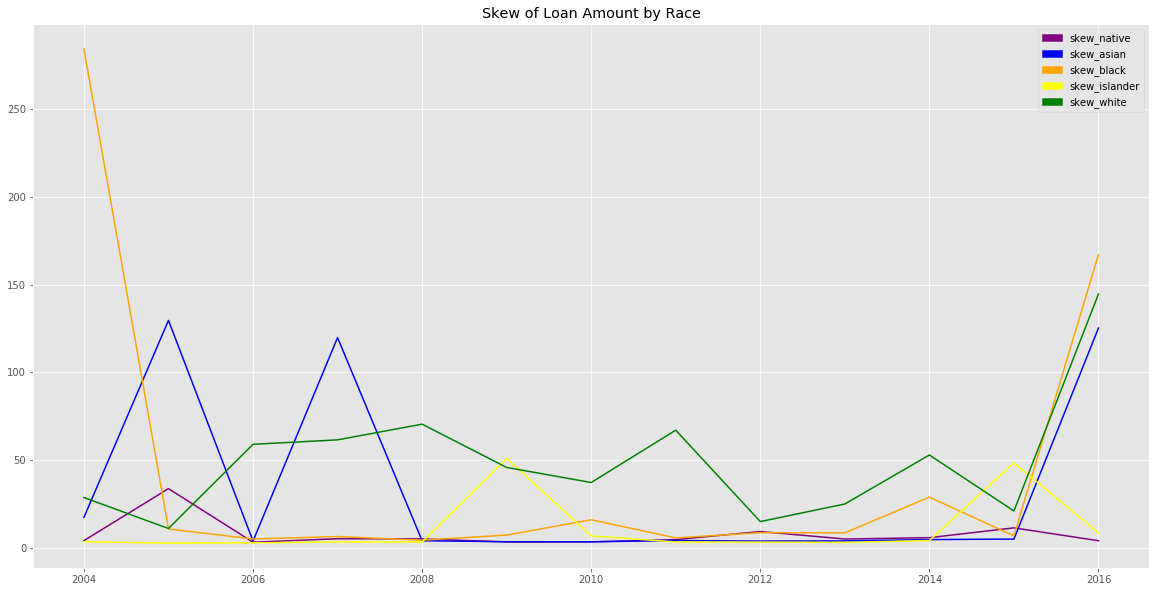

In [130]:
line_graph(sf_purch_df[["skew_native", "skew_asian", "skew_black", "skew_islander", "skew_white"]], 
           title="Skew of Loan Amount by Race")

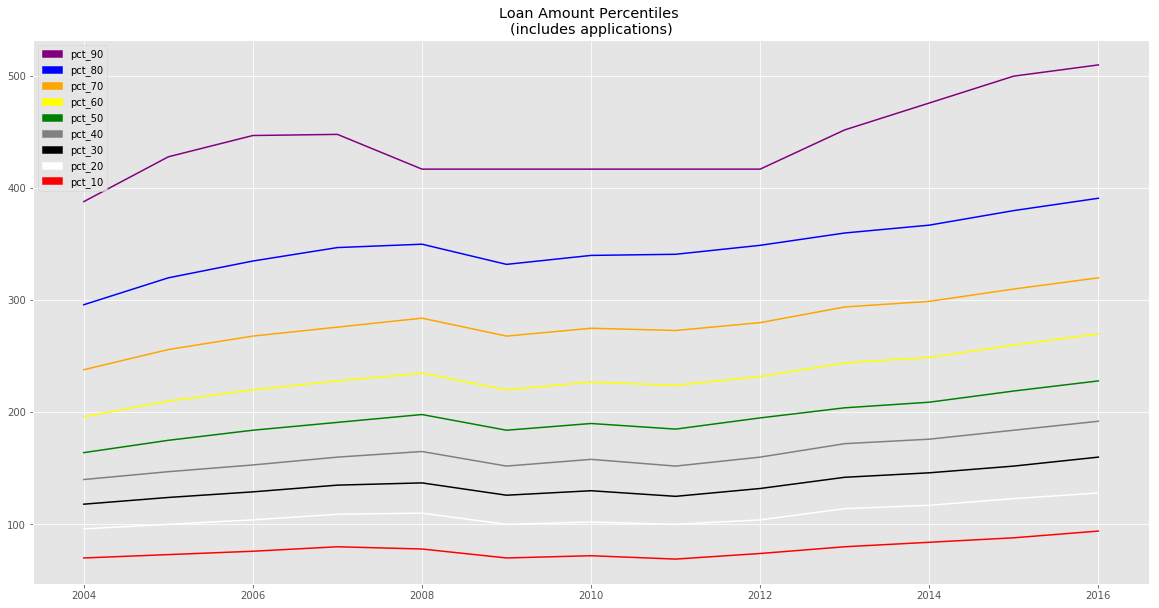

In [131]:
line_graph(sf_purch_df[["pct_90", "pct_80", "pct_70", "pct_60", "pct_50", "pct_40", "pct_30", "pct_20", "pct_10"]],
          title="Loan Amount Percentiles \n(includes applications)")
#what is the rate of change for each? how much higher is pct90?

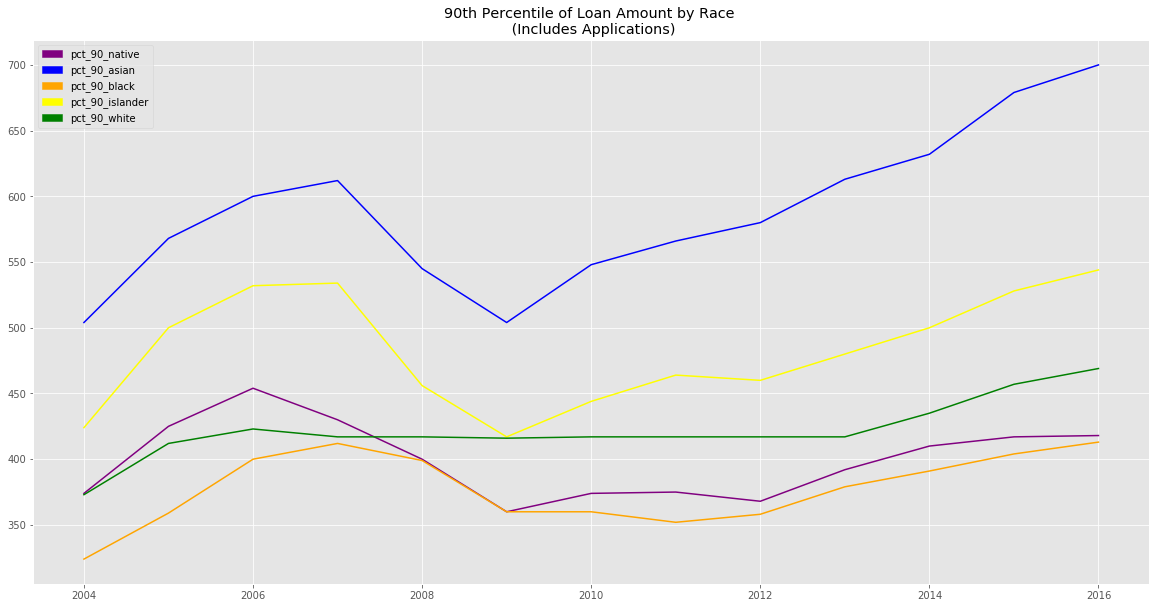

In [132]:
line_graph(sf_purch_df[["pct_90_native", "pct_90_asian", "pct_90_black", "pct_90_islander", "pct_90_white"]],
          title="90th Percentile of Loan Amount by Race \n (Includes Applications)")

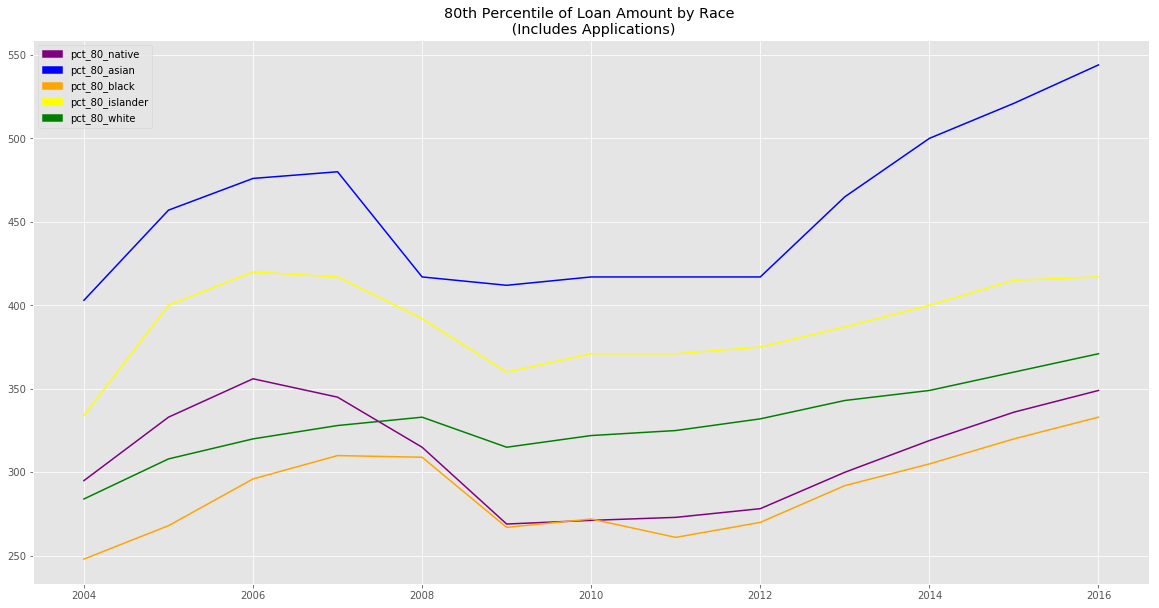

In [151]:
line_graph(sf_purch_df[["pct_80_native", "pct_80_asian", "pct_80_black", "pct_80_islander", "pct_80_white"]],
         title="80th Percentile of Loan Amount by Race \n (Includes Applications)")

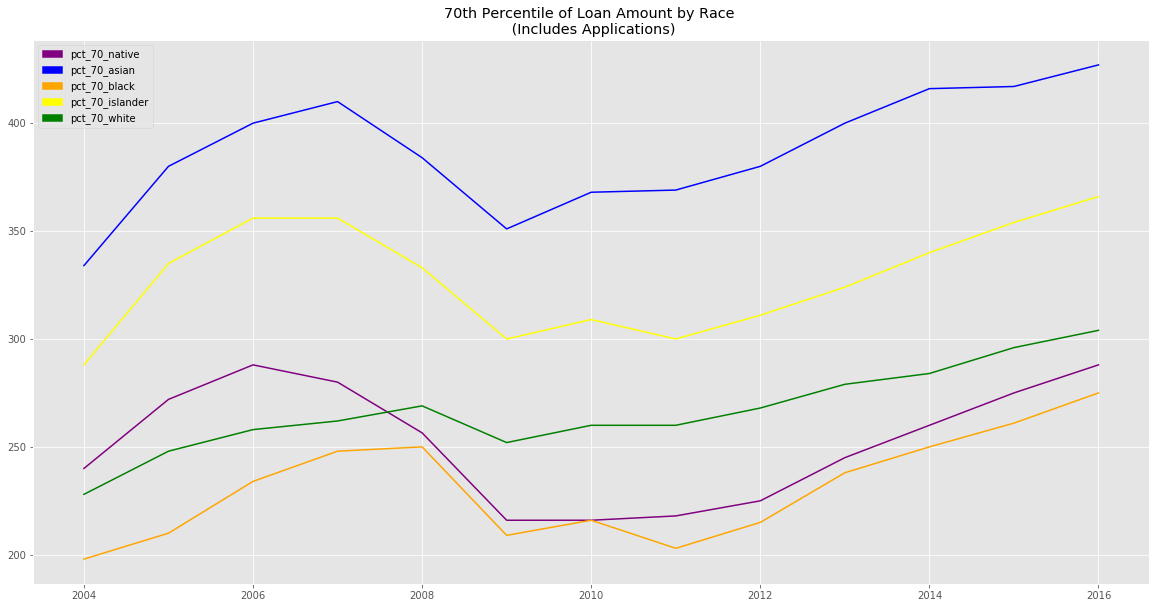

In [153]:
line_graph(sf_purch_df[["pct_70_native", "pct_70_asian", "pct_70_black", "pct_70_islander", "pct_70_white"]],
          title="70th Percentile of Loan Amount by Race \n (Includes Applications)")

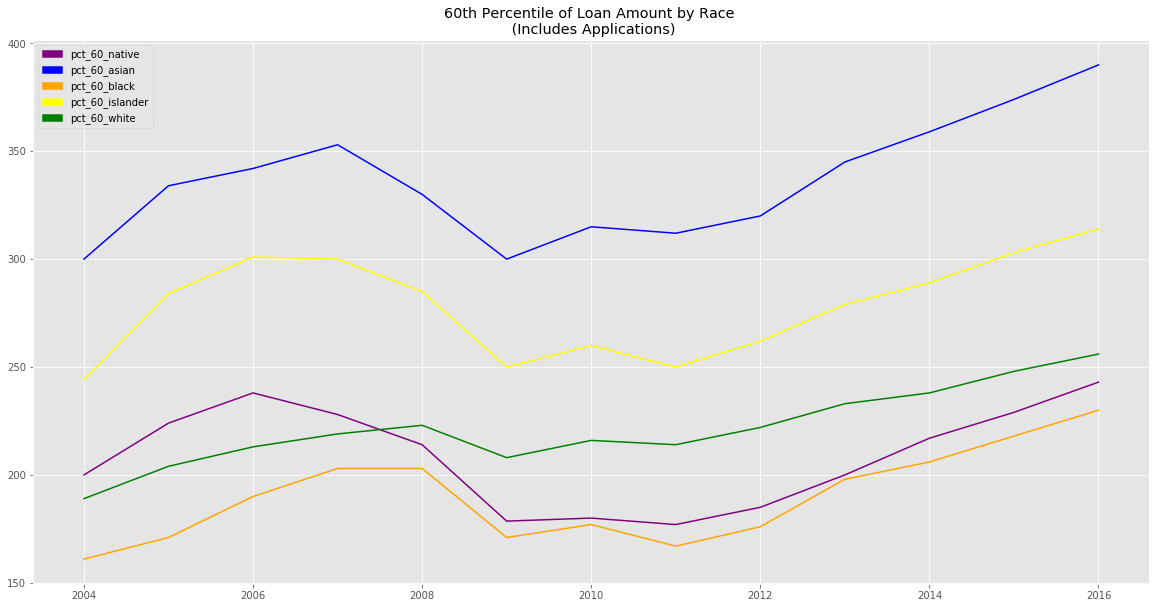

In [154]:
line_graph(sf_purch_df[["pct_60_native", "pct_60_asian", "pct_60_black", "pct_60_islander", "pct_60_white"]],
           title="60th Percentile of Loan Amount by Race \n (Includes Applications)")

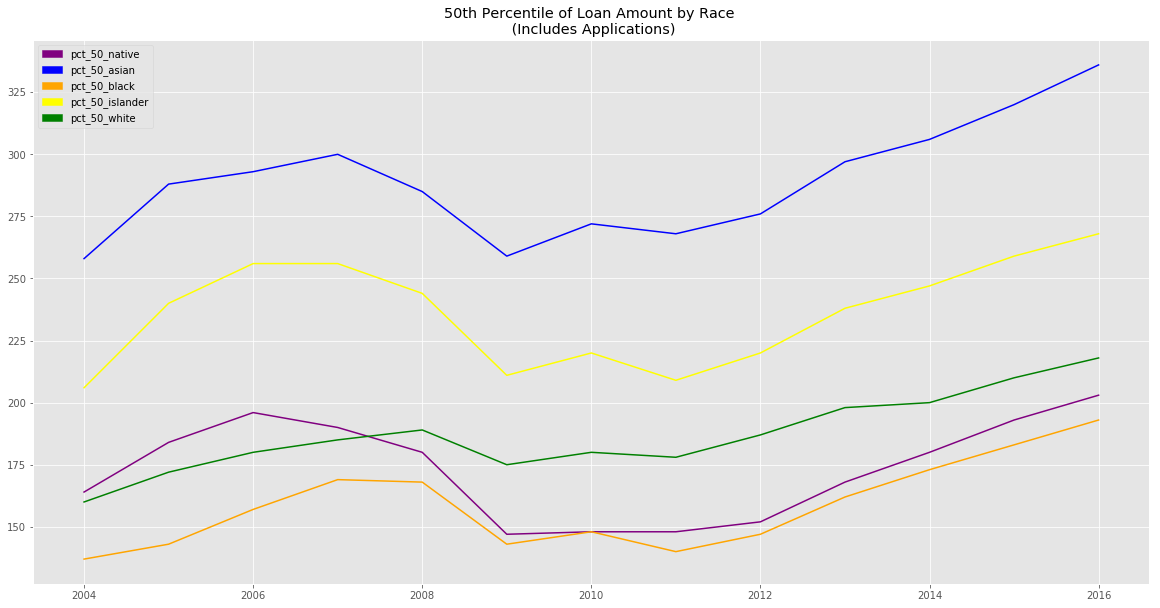

In [155]:
line_graph(sf_purch_df[["pct_50_native", "pct_50_asian", "pct_50_black", "pct_50_islander", "pct_50_white"]],
           title="50th Percentile of Loan Amount by Race \n (Includes Applications)")

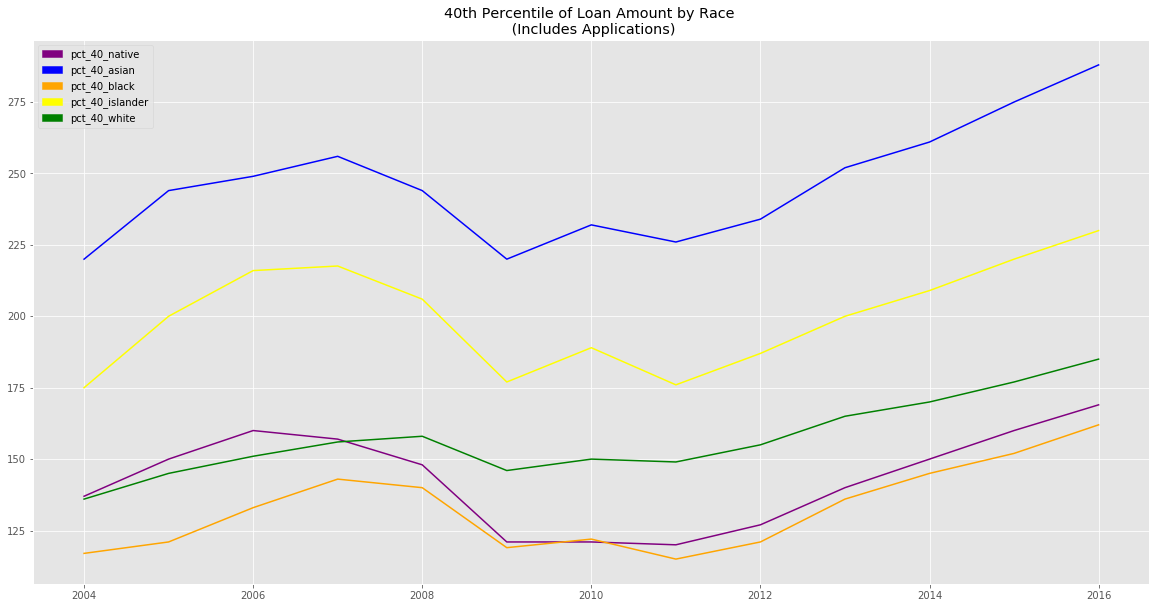

In [156]:
line_graph(sf_purch_df[["pct_40_native", "pct_40_asian", "pct_40_black", "pct_40_islander", "pct_40_white"]],
           title="40th Percentile of Loan Amount by Race \n (Includes Applications)")

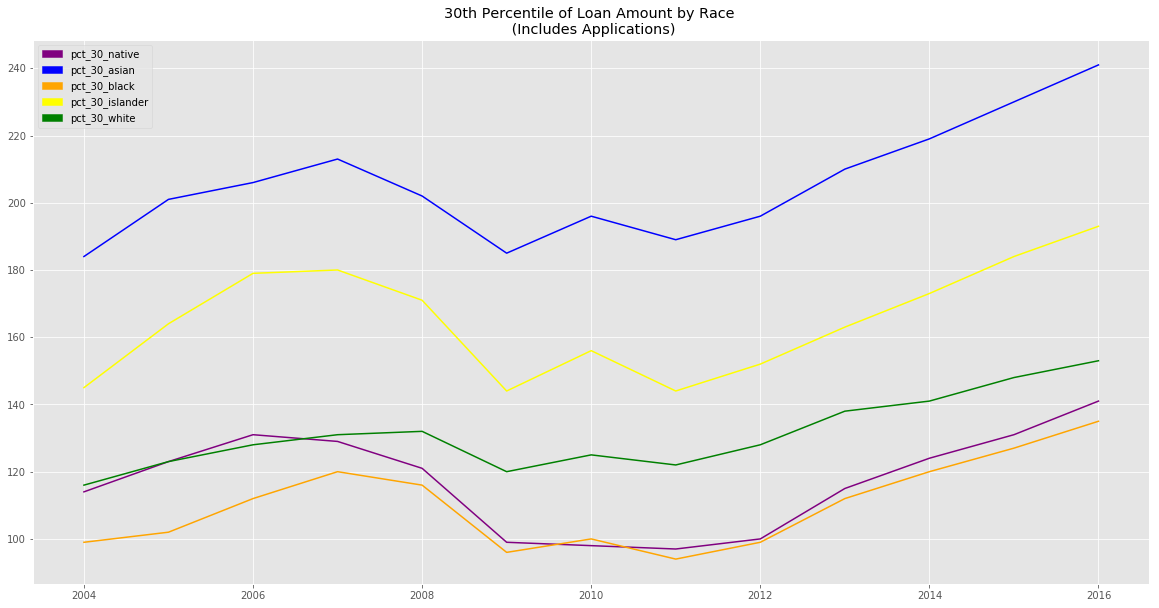

In [157]:
line_graph(sf_purch_df[["pct_30_native", "pct_30_asian", "pct_30_black", "pct_30_islander", "pct_30_white"]],
           title="30th Percentile of Loan Amount by Race \n (Includes Applications)")

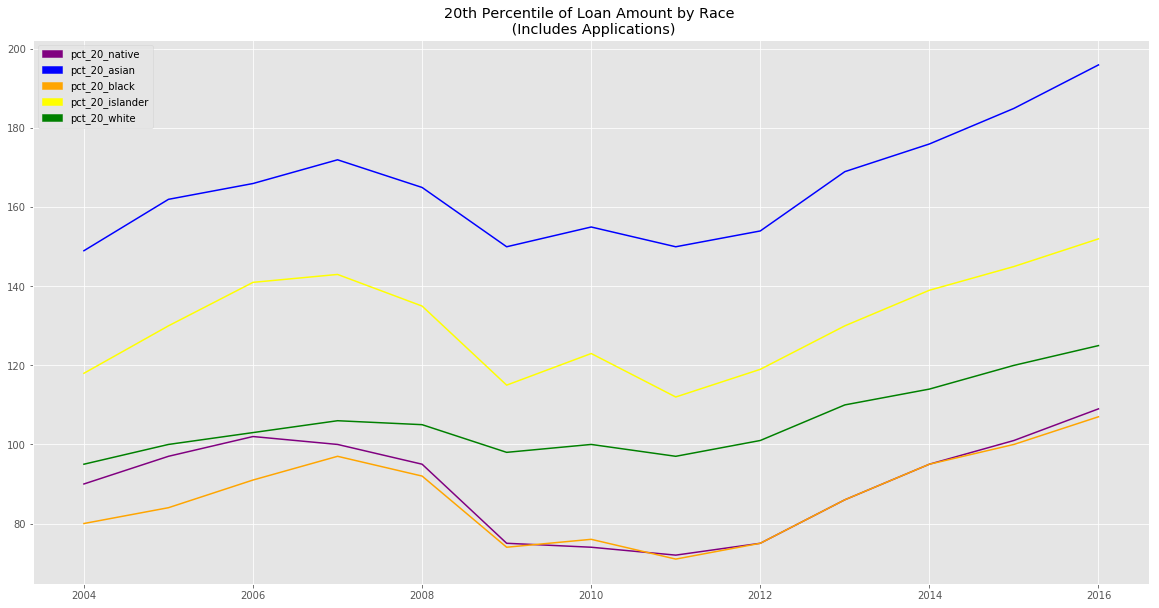

In [158]:
line_graph(sf_purch_df[["pct_20_native", "pct_20_asian", "pct_20_black", "pct_20_islander", "pct_20_white"]],
           title="20th Percentile of Loan Amount by Race \n (Includes Applications)")

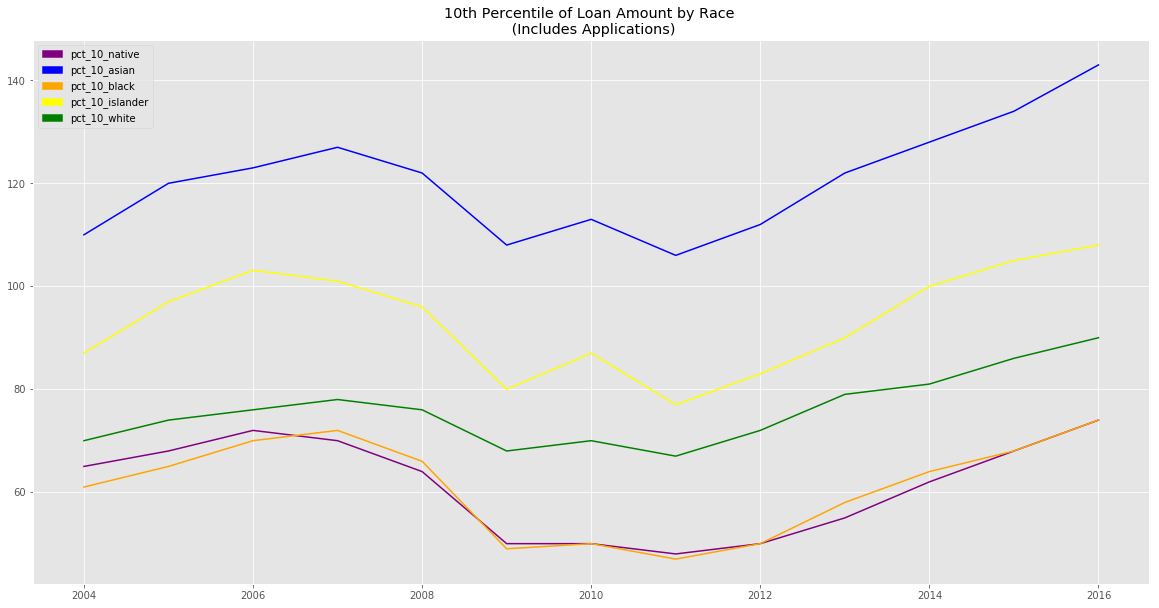

In [159]:
line_graph(sf_purch_df[["pct_10_native", "pct_10_asian", "pct_10_black", "pct_10_islander", "pct_10_white"]],
           title="10th Percentile of Loan Amount by Race \n (Includes Applications)")

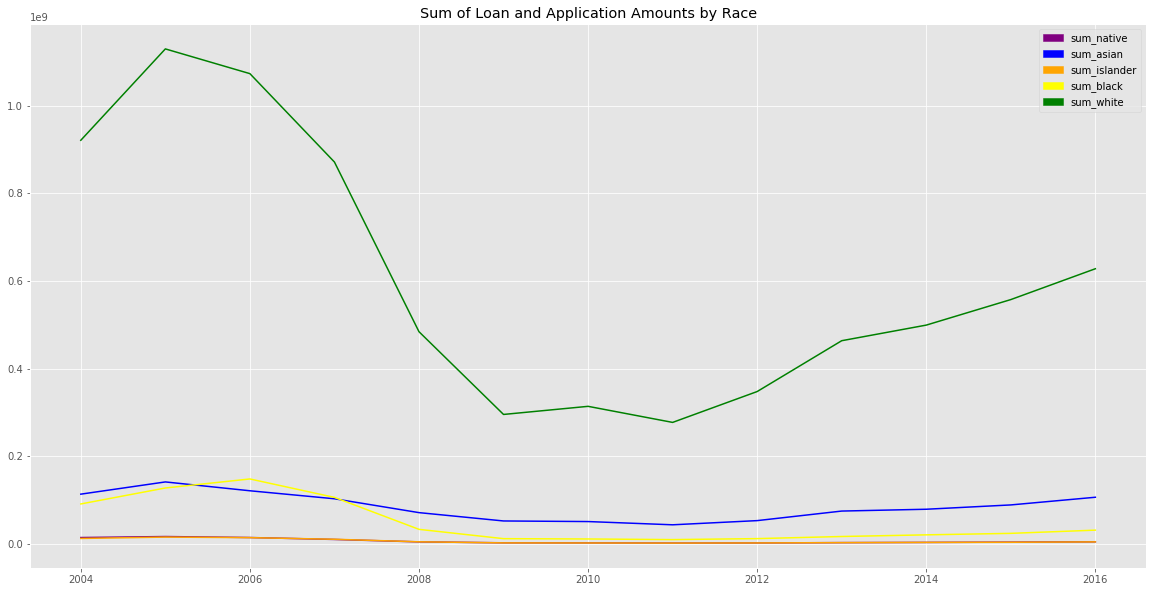

In [160]:
line_graph(sf_purch_df[["sum_native", "sum_asian", "sum_islander", "sum_black", "sum_white"]],
          title="Sum of Loan and Application Amounts by Race")
#not showing white highlights trend of other categories

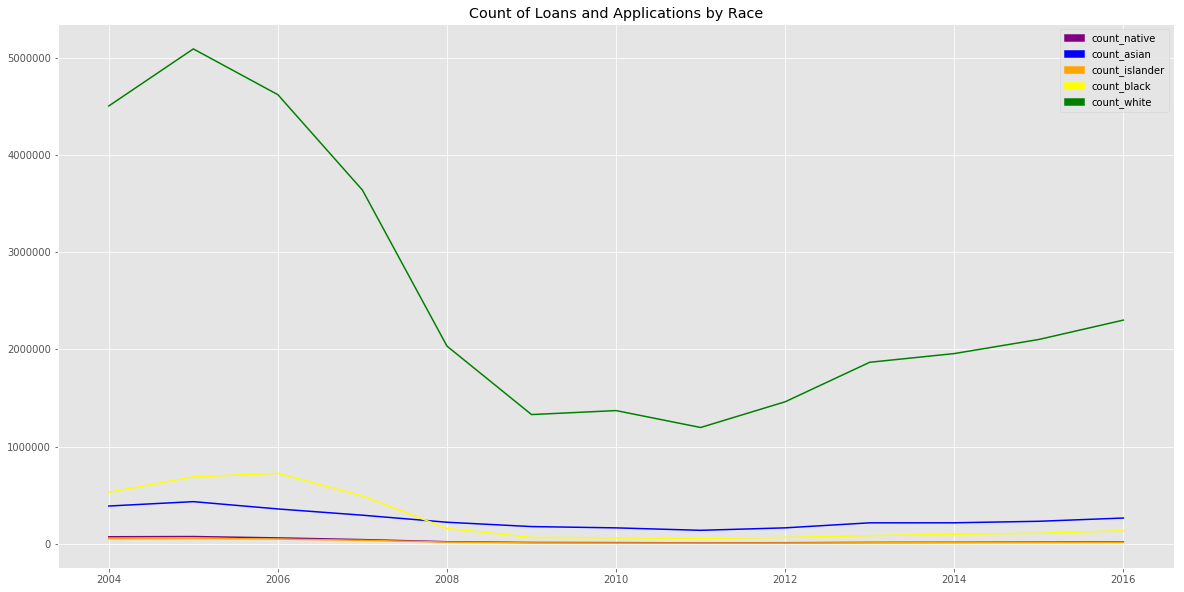

In [163]:
line_graph(sf_purch_df[["count_native", "count_asian", "count_islander", "count_black", "count_white"]],
          title="Count of Loans and Applications by Race")

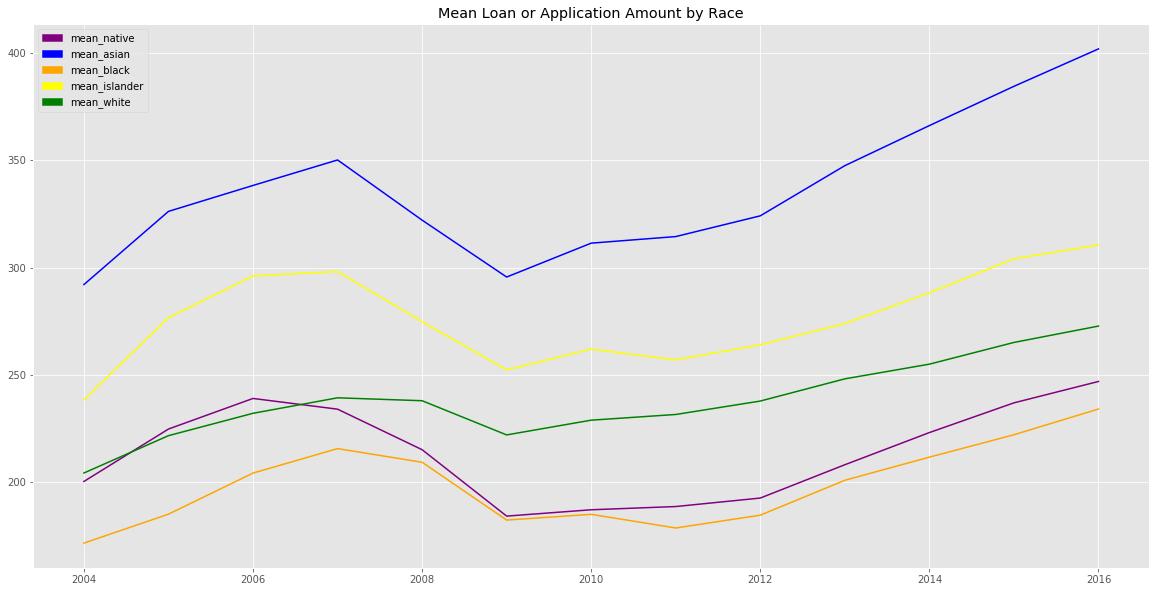

In [162]:
line_graph(sf_purch_df[["mean_native", "mean_asian", "mean_black", "mean_islander", "mean_white"]],
          title="Mean Loan or Application Amount by Race")


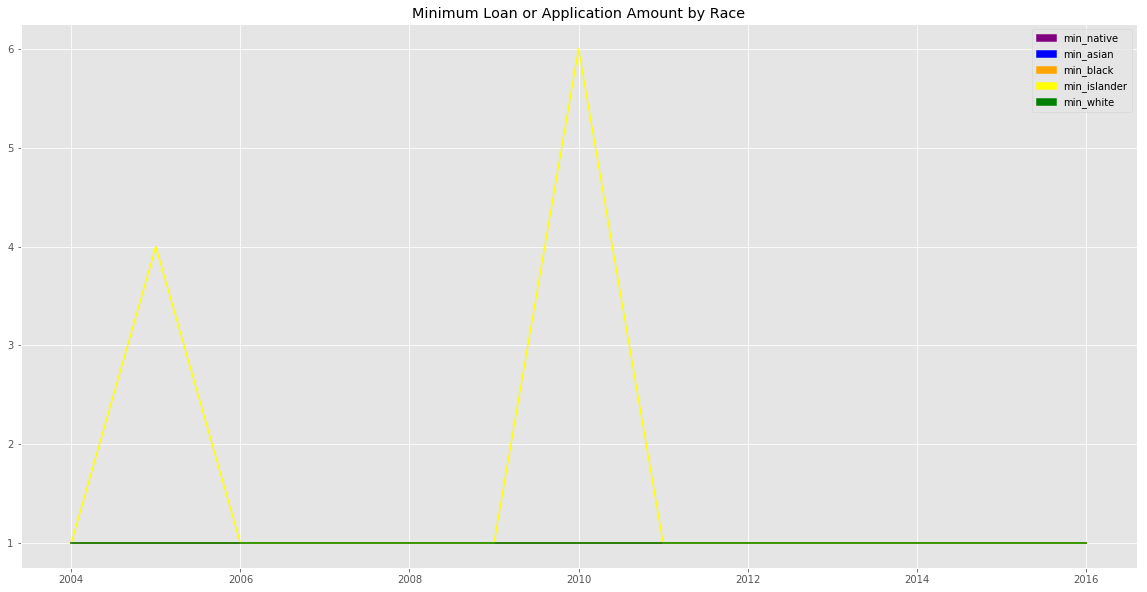

In [165]:
line_graph(sf_purch_df[["min_native", "min_asian", "min_black", "min_islander", "min_white"]],
          title="Minimum Loan or Application Amount by Race")

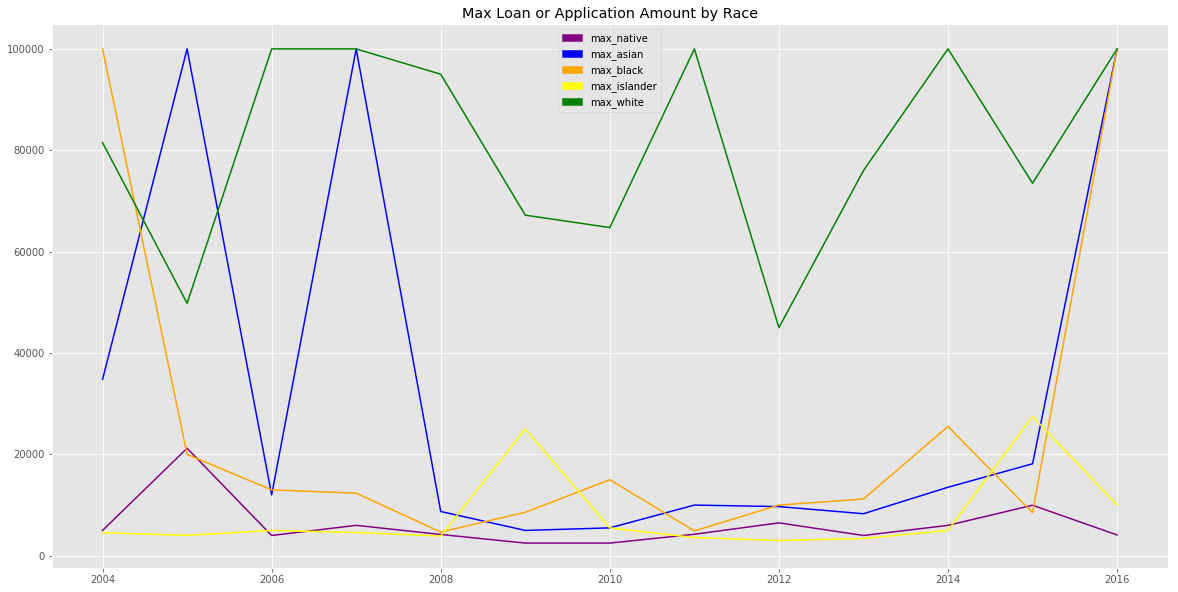

In [167]:
line_graph(sf_purch_df[["max_native", "max_asian", "max_black", "max_islander", "max_white"]],
          title="Max Loan or Application Amount by Race")

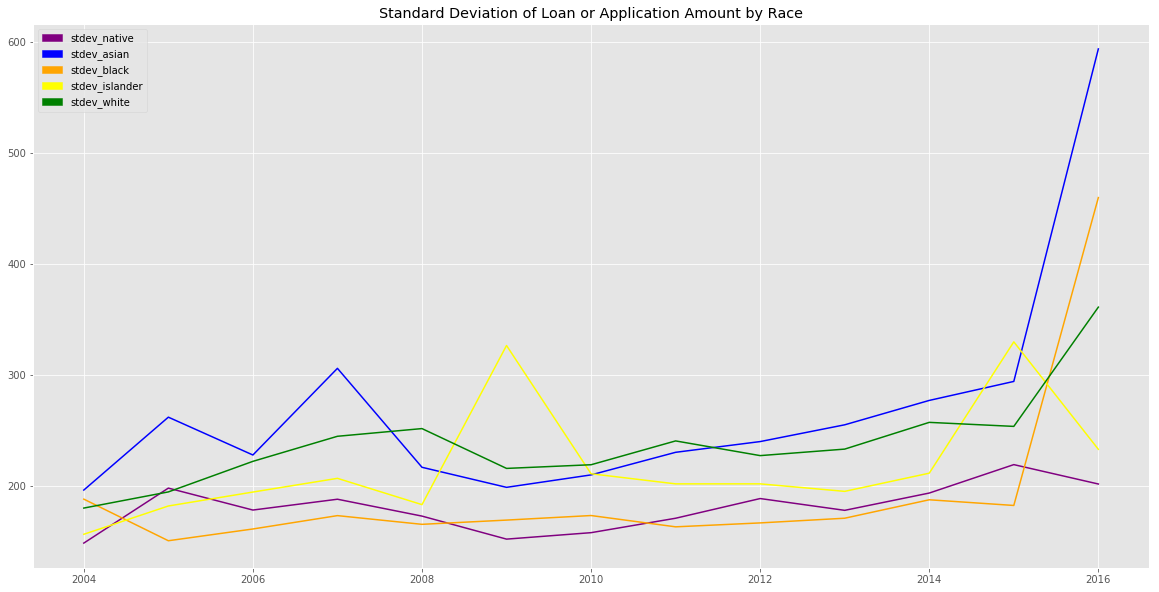

In [168]:
line_graph(sf_purch_df[["stdev_native", "stdev_asian", "stdev_black", "stdev_islander", "stdev_white"]],
          title="Standard Deviation of Loan or Application Amount by Race")

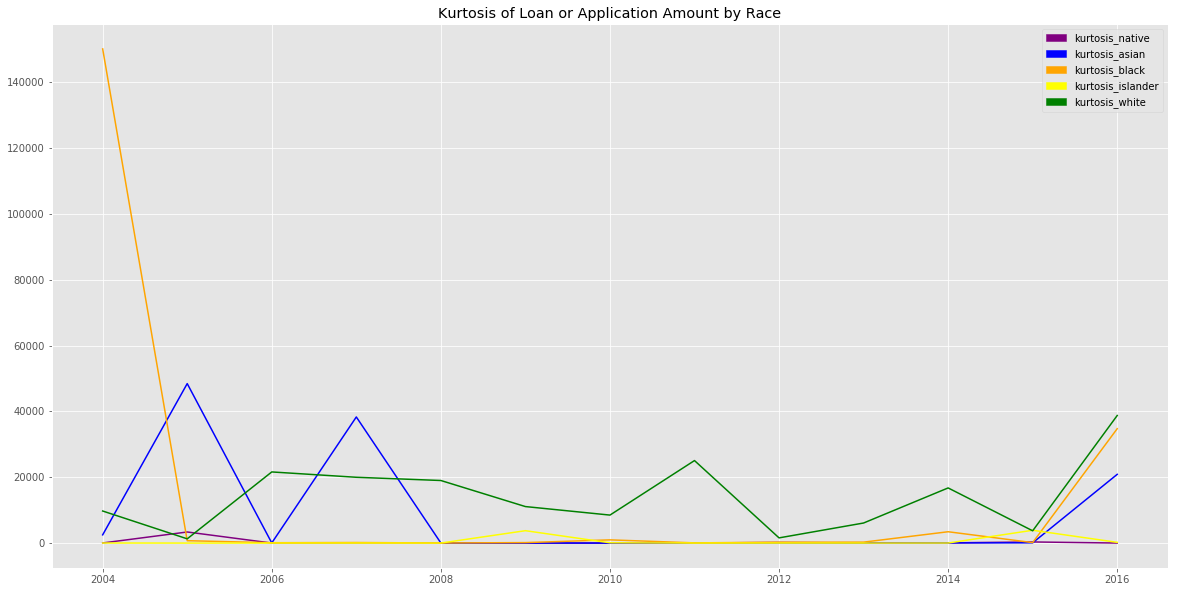

In [169]:
line_graph(sf_purch_df[["kurtosis_native", "kurtosis_asian", "kurtosis_black", "kurtosis_islander", "kurtosis_white"]],
          title="Kurtosis of Loan or Application Amount by Race")

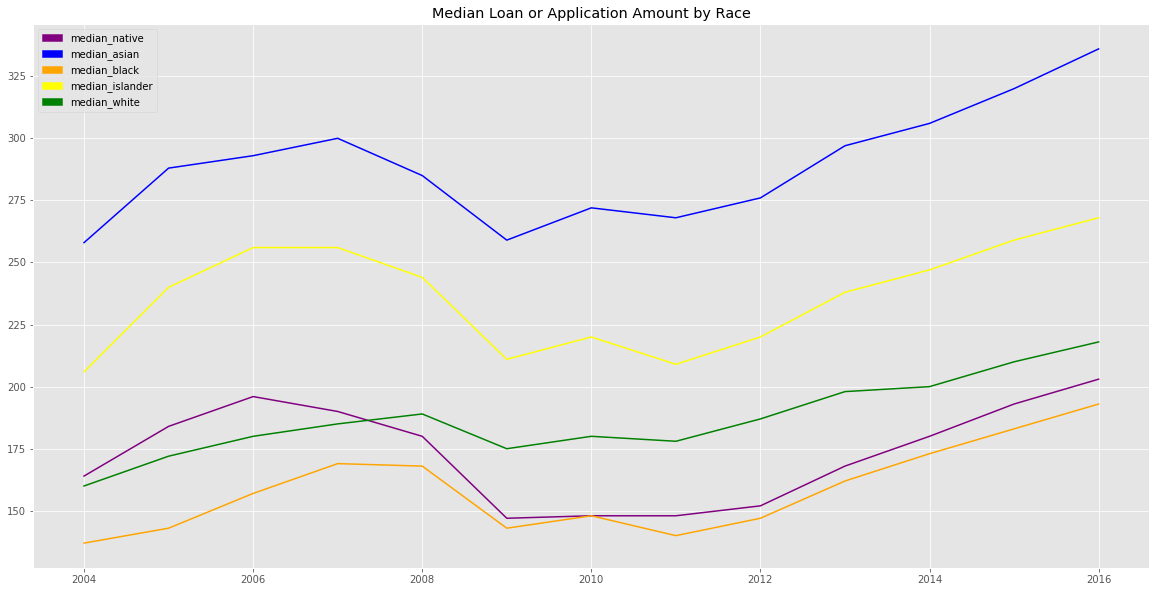

In [170]:
line_graph(sf_purch_df[["median_native", "median_asian", "median_black", "median_islander", "median_white"]],
          title="Median Loan or Application Amount by Race")

In [101]:
#boxplots of amount by race/year to check for outliers


In [115]:
action_race_df.columns.ravel()

array(['action', 'native', 'asian', 'black', 'islander', 'white',
       'no_info', 'NA', 'year', 'total_count', 'native_pct', 'asian_pct',
       'black_pct', 'islander_pct', 'white_pct', 'NA_pct', 'no_info_pct'], dtype=object)

### Frequency graphs for action and action/race

In [171]:
action_freq_df.head()

,year,action,freq_pct,action_count
0,2004,1,45,15039576
1,2004,2,7,2386881
2,2004,3,18,6039944
3,2004,4,11,3618966
4,2004,5,3,1065249


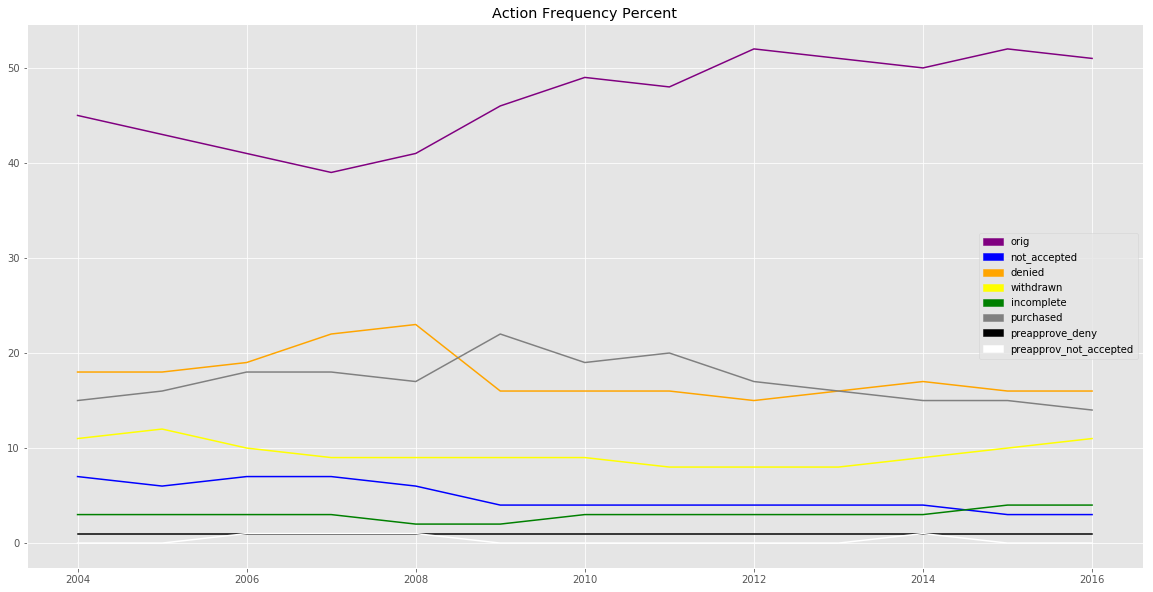

In [136]:
    
y_dict = {}
y_dict["orig"] = action_freq_df["freq_pct"][action_freq_df.action==1]
y_dict["not_accepted"] = action_freq_df["freq_pct"][action_freq_df.action==2]
y_dict["denied"] = action_freq_df["freq_pct"][action_freq_df.action==3]
y_dict["withdrawn"] = action_freq_df["freq_pct"][action_freq_df.action==4]
y_dict["incomplete"] = action_freq_df["freq_pct"][action_freq_df.action==5]
y_dict["purchased"] = action_freq_df["freq_pct"][action_freq_df.action==6]
y_dict["preapprove_deny"] = action_freq_df["freq_pct"][action_freq_df.action==7]
y_dict["preapprov_not_accepted"] = action_freq_df["freq_pct"][action_freq_df.action==8]

tabular_lines(y_dict, title="Action Frequency Percent")


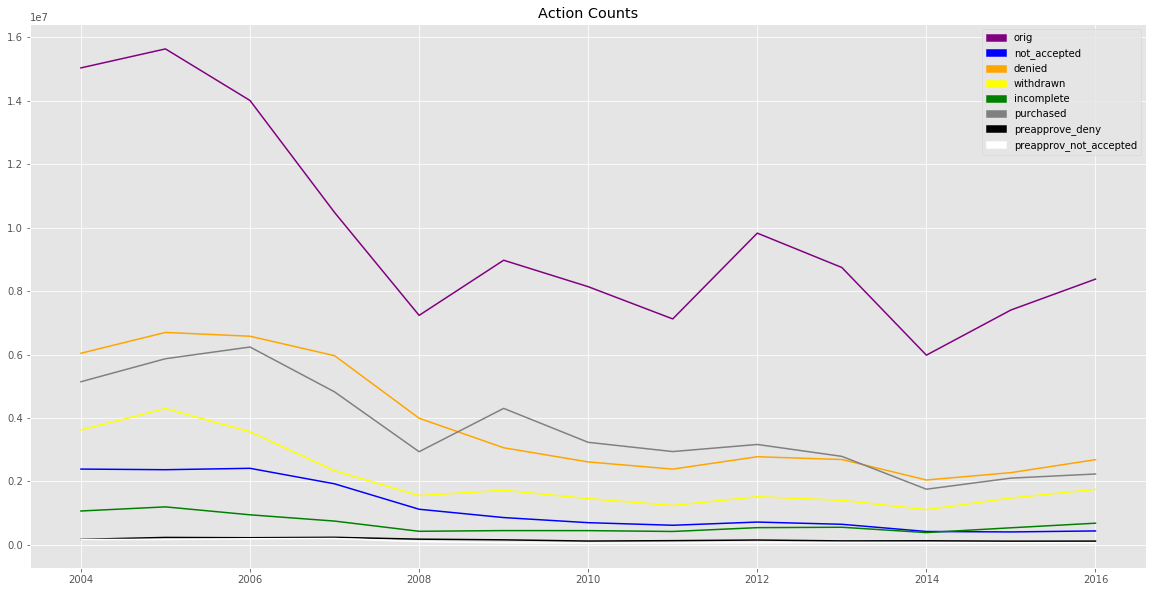

In [150]:
    
y_dict = {}
y_dict["orig"] = action_freq_df["action_count"][action_freq_df.action==1]
y_dict["not_accepted"] = action_freq_df["action_count"][action_freq_df.action==2]
y_dict["denied"] = action_freq_df["action_count"][action_freq_df.action==3]
y_dict["withdrawn"] = action_freq_df["action_count"][action_freq_df.action==4]
y_dict["incomplete"] = action_freq_df["action_count"][action_freq_df.action==5]
y_dict["purchased"] = action_freq_df["action_count"][action_freq_df.action==6]
y_dict["preapprove_deny"] = action_freq_df["action_count"][action_freq_df.action==7]
y_dict["preapprov_not_accepted"] = action_freq_df["action_count"][action_freq_df.action==8]

tabular_lines(y_dict, title="Action Counts")

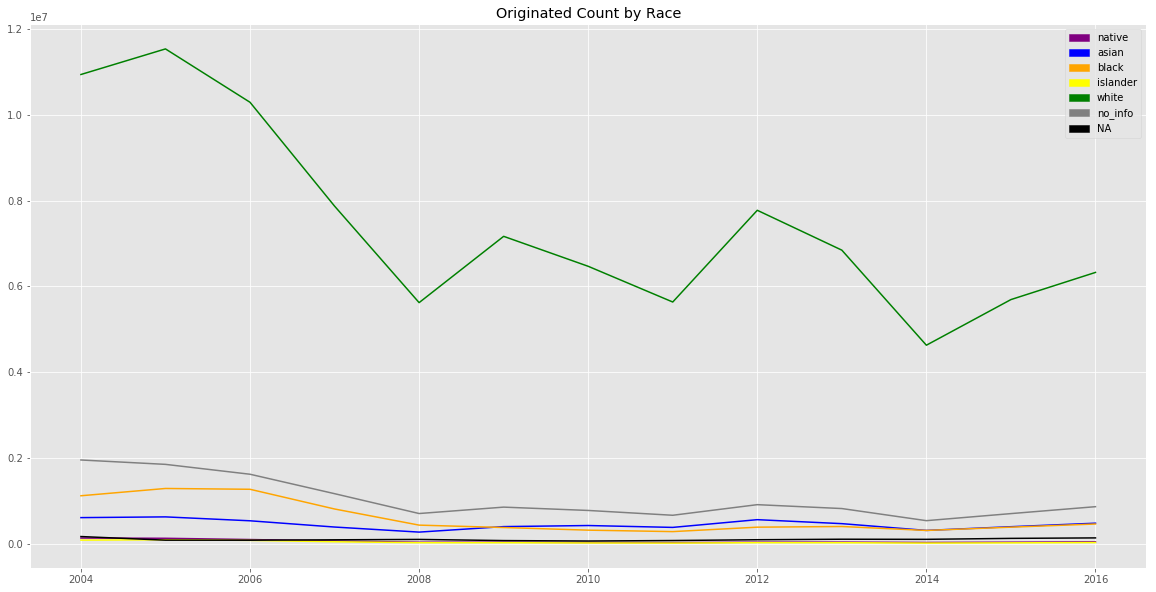

In [138]:

y_dict = {}
y_dict["native"] = action_race_df["native"][action_race_df.action==1]
y_dict["asian"] = action_race_df["asian"][action_race_df.action==1]
y_dict["black"] = action_race_df["black"][action_race_df.action==1]
y_dict["islander"] = action_race_df["islander"][action_race_df.action==1]
y_dict["white"] = action_race_df["white"][action_race_df.action==1]
y_dict["no_info"] = action_race_df["no_info"][action_race_df.action==1]
y_dict["NA"] = action_race_df["NA"][action_race_df.action==1]
tabular_lines(y_dict, title="Originated Count by Race")

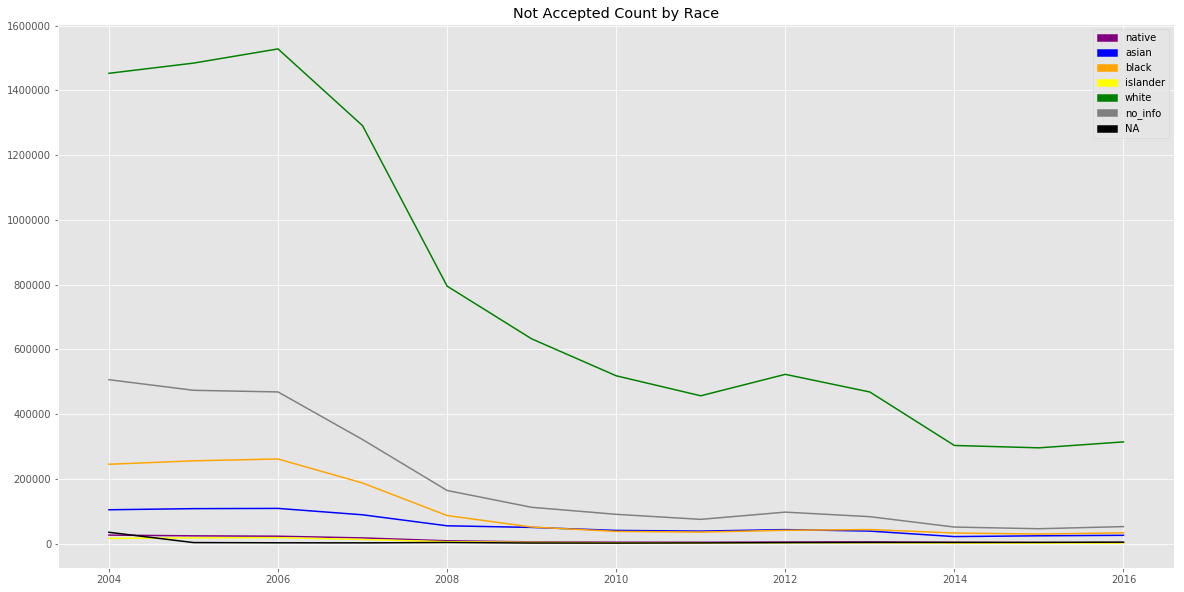

In [172]:

y_dict = {}
y_dict["native"] = action_race_df["native"][action_race_df.action==2]
y_dict["asian"] = action_race_df["asian"][action_race_df.action==2]
y_dict["black"] = action_race_df["black"][action_race_df.action==2]
y_dict["islander"] = action_race_df["islander"][action_race_df.action==2]
y_dict["white"] = action_race_df["white"][action_race_df.action==2]
y_dict["no_info"] = action_race_df["no_info"][action_race_df.action==2]
y_dict["NA"] = action_race_df["NA"][action_race_df.action==2]
tabular_lines(y_dict, title="Not Accepted Count by Race")

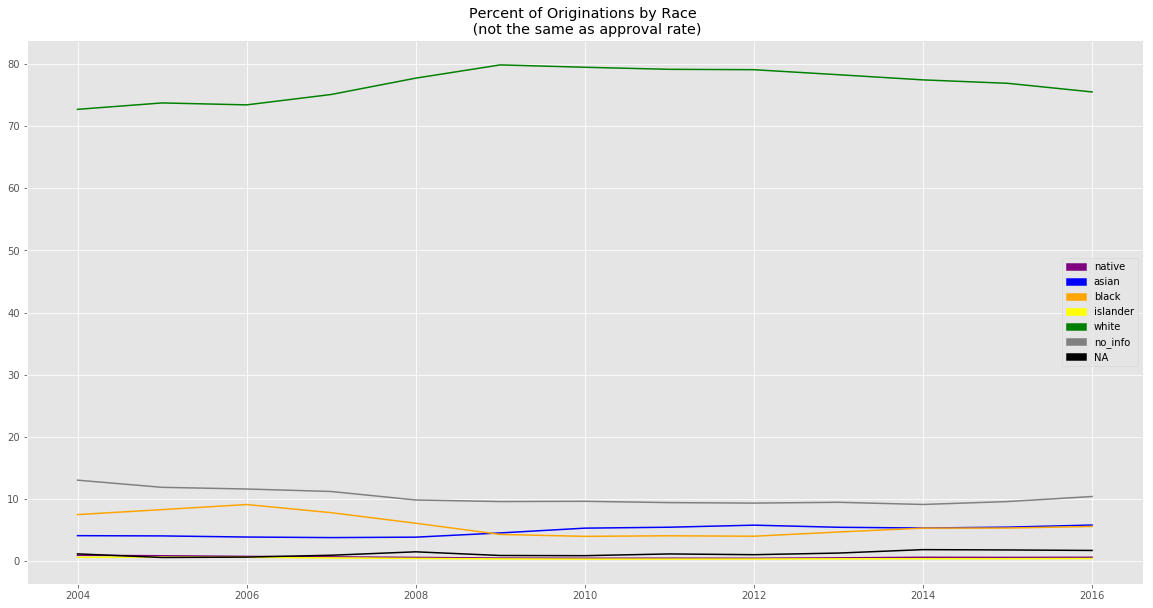

In [140]:
y_dict = {}
y_dict["native"] = action_race_df["native_pct"][action_race_df.action==1]
y_dict["asian"] = action_race_df["asian_pct"][action_race_df.action==1]
y_dict["black"] = action_race_df["black_pct"][action_race_df.action==1]
y_dict["islander"] = action_race_df["islander_pct"][action_race_df.action==1]
y_dict["white"] = action_race_df["white_pct"][action_race_df.action==1]
y_dict["no_info"] = action_race_df["no_info_pct"][action_race_df.action==1]
y_dict["NA"] = action_race_df["NA_pct"][action_race_df.action==1]
tabular_lines(y_dict, title="Percent of Originations by Race \n (not the same as approval rate)")

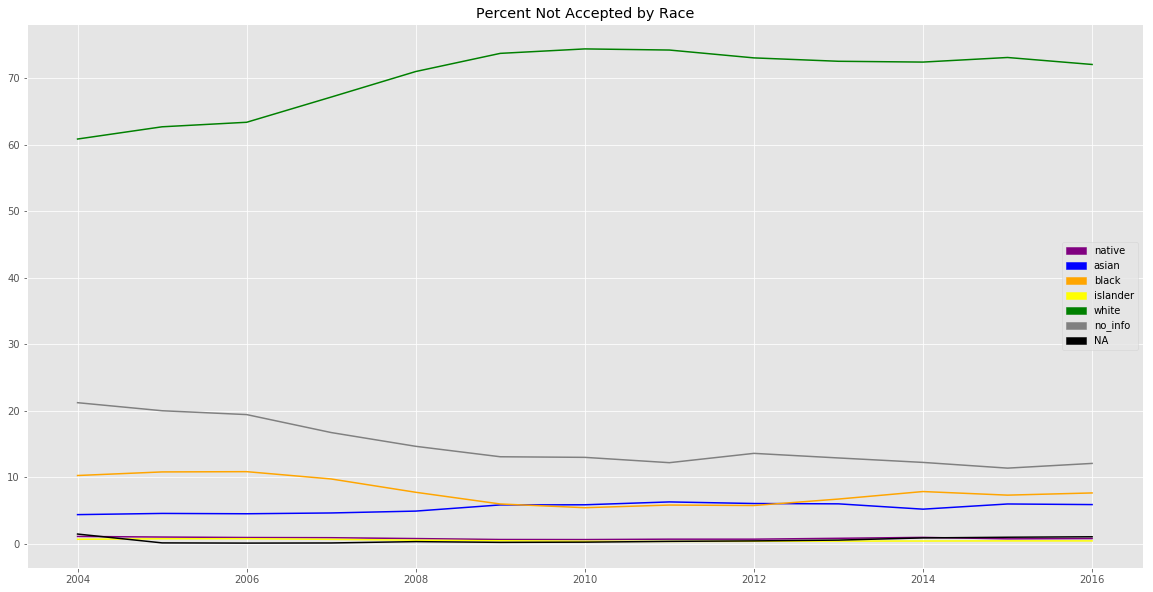

In [141]:
y_dict = {}
y_dict["native"] = action_race_df["native_pct"][action_race_df.action==2]
y_dict["asian"] = action_race_df["asian_pct"][action_race_df.action==2]
y_dict["black"] = action_race_df["black_pct"][action_race_df.action==2]
y_dict["islander"] = action_race_df["islander_pct"][action_race_df.action==2]
y_dict["white"] = action_race_df["white_pct"][action_race_df.action==2]
y_dict["no_info"] = action_race_df["no_info_pct"][action_race_df.action==2]
y_dict["NA"] = action_race_df["NA_pct"][action_race_df.action==2]
tabular_lines(y_dict, title="Percent Not Accepted by Race")

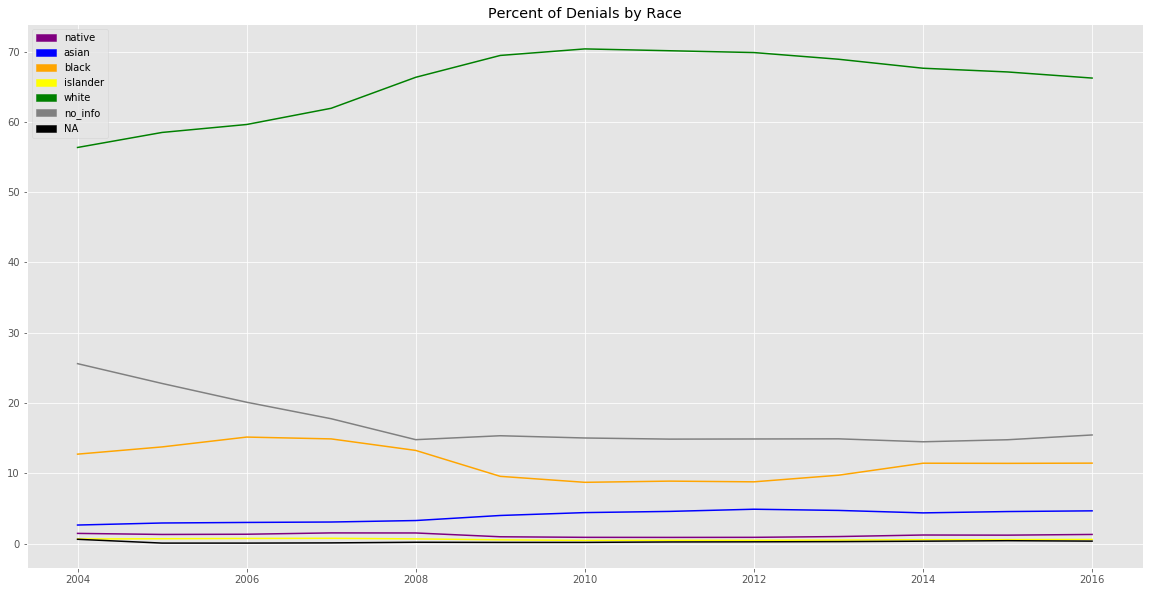

In [142]:
y_dict = {}
y_dict["native"] = action_race_df["native_pct"][action_race_df.action==3]
y_dict["asian"] = action_race_df["asian_pct"][action_race_df.action==3]
y_dict["black"] = action_race_df["black_pct"][action_race_df.action==3]
y_dict["islander"] = action_race_df["islander_pct"][action_race_df.action==3]
y_dict["white"] = action_race_df["white_pct"][action_race_df.action==3]
y_dict["no_info"] = action_race_df["no_info_pct"][action_race_df.action==3]
y_dict["NA"] = action_race_df["NA_pct"][action_race_df.action==3]
tabular_lines(y_dict, title="Percent of Denials by Race")

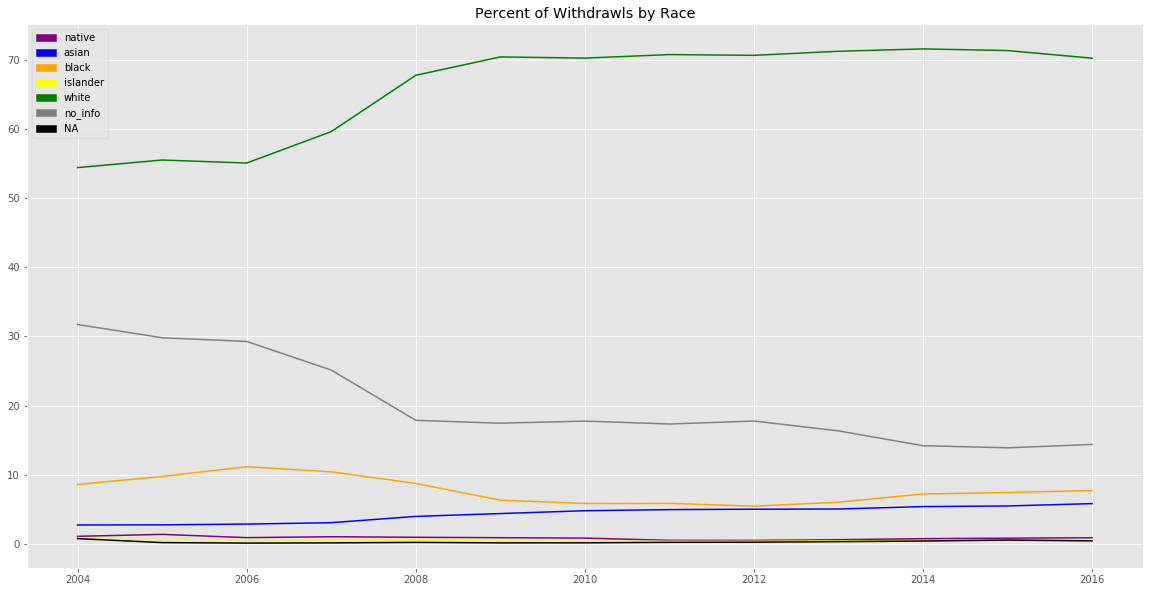

In [143]:
y_dict = {}
y_dict["native"] = action_race_df["native_pct"][action_race_df.action==4]
y_dict["asian"] = action_race_df["asian_pct"][action_race_df.action==4]
y_dict["black"] = action_race_df["black_pct"][action_race_df.action==4]
y_dict["islander"] = action_race_df["islander_pct"][action_race_df.action==4]
y_dict["white"] = action_race_df["white_pct"][action_race_df.action==4]
y_dict["no_info"] = action_race_df["no_info_pct"][action_race_df.action==4]
y_dict["NA"] = action_race_df["NA_pct"][action_race_df.action==4]
tabular_lines(y_dict, title="Percent of Withdrawls by Race")

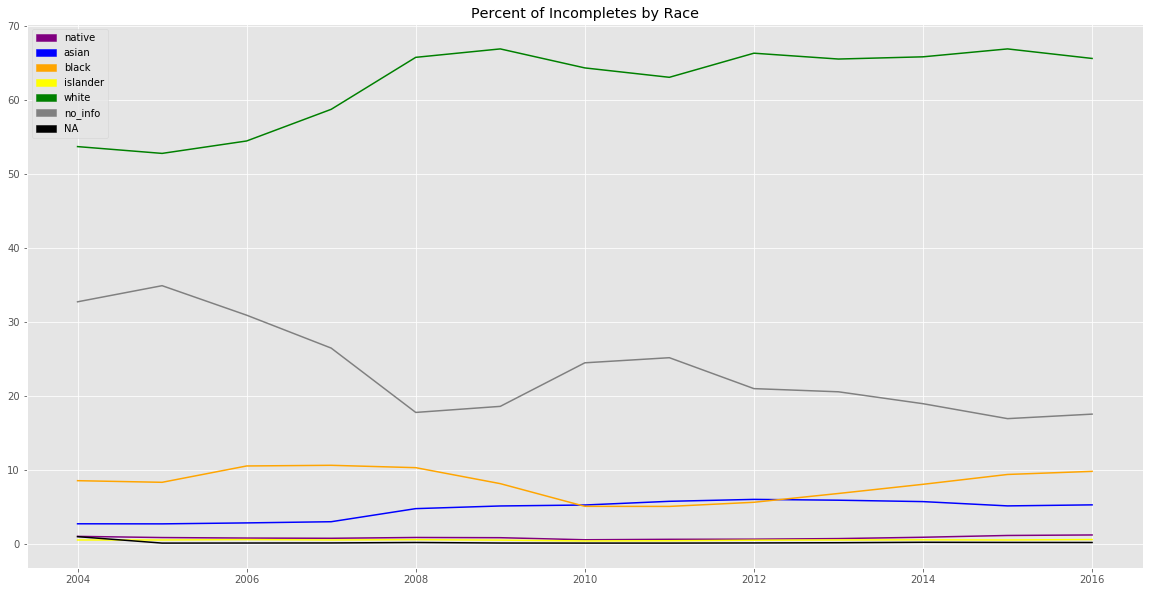

In [144]:
y_dict = {}
y_dict["native"] = action_race_df["native_pct"][action_race_df.action==5]
y_dict["asian"] = action_race_df["asian_pct"][action_race_df.action==5]
y_dict["black"] = action_race_df["black_pct"][action_race_df.action==5]
y_dict["islander"] = action_race_df["islander_pct"][action_race_df.action==5]
y_dict["white"] = action_race_df["white_pct"][action_race_df.action==5]
y_dict["no_info"] = action_race_df["no_info_pct"][action_race_df.action==5]
y_dict["NA"] = action_race_df["NA_pct"][action_race_df.action==5]
tabular_lines(y_dict, title="Percent of Incompletes by Race")

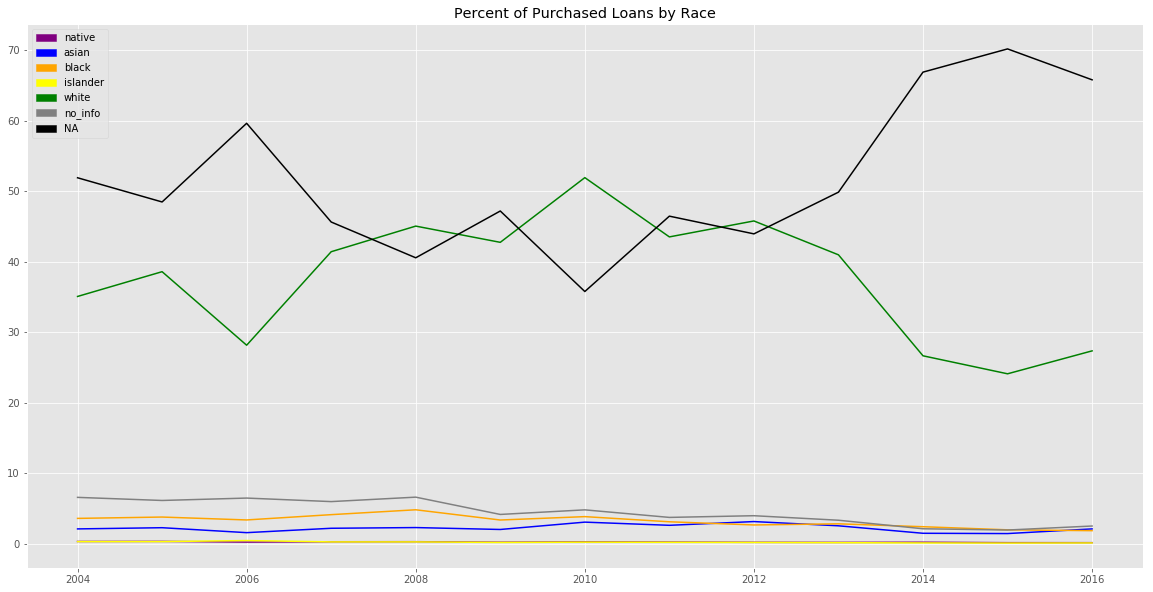

In [145]:
y_dict = {}
y_dict["native"] = action_race_df["native_pct"][action_race_df.action==6]
y_dict["asian"] = action_race_df["asian_pct"][action_race_df.action==6]
y_dict["black"] = action_race_df["black_pct"][action_race_df.action==6]
y_dict["islander"] = action_race_df["islander_pct"][action_race_df.action==6]
y_dict["white"] = action_race_df["white_pct"][action_race_df.action==6]
y_dict["no_info"] = action_race_df["no_info_pct"][action_race_df.action==6]
y_dict["NA"] = action_race_df["NA_pct"][action_race_df.action==6]
tabular_lines(y_dict, title="Percent of Purchased Loans by Race")

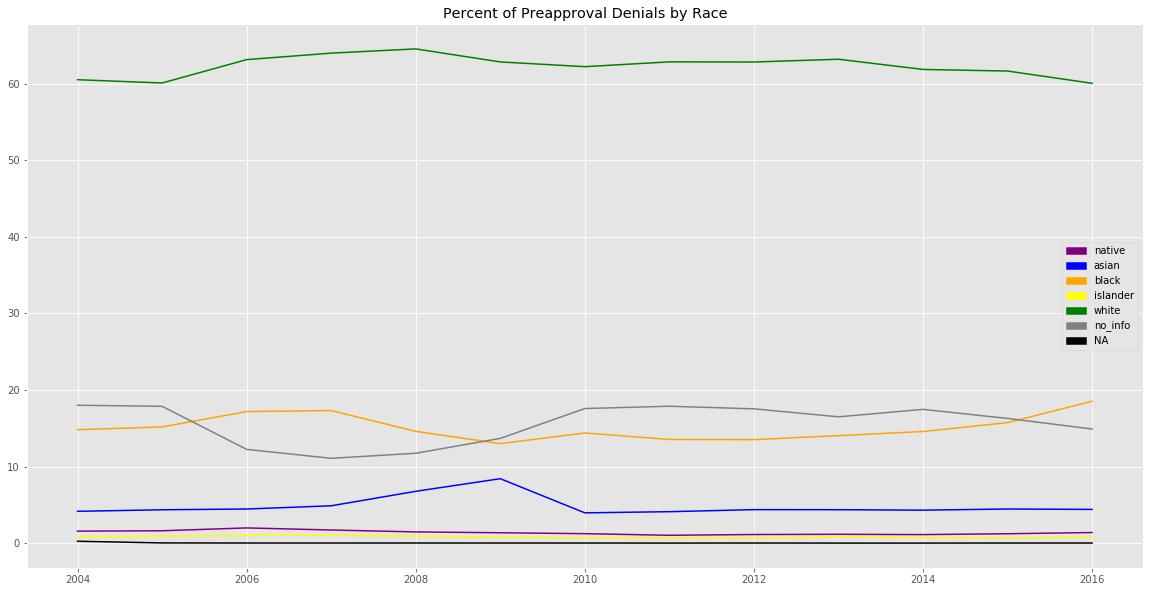

In [146]:
y_dict = {}
y_dict["native"] = action_race_df["native_pct"][action_race_df.action==7]
y_dict["asian"] = action_race_df["asian_pct"][action_race_df.action==7]
y_dict["black"] = action_race_df["black_pct"][action_race_df.action==7]
y_dict["islander"] = action_race_df["islander_pct"][action_race_df.action==7]
y_dict["white"] = action_race_df["white_pct"][action_race_df.action==7]
y_dict["no_info"] = action_race_df["no_info_pct"][action_race_df.action==7]
y_dict["NA"] = action_race_df["NA_pct"][action_race_df.action==7]
tabular_lines(y_dict, title="Percent of Preapproval Denials by Race")

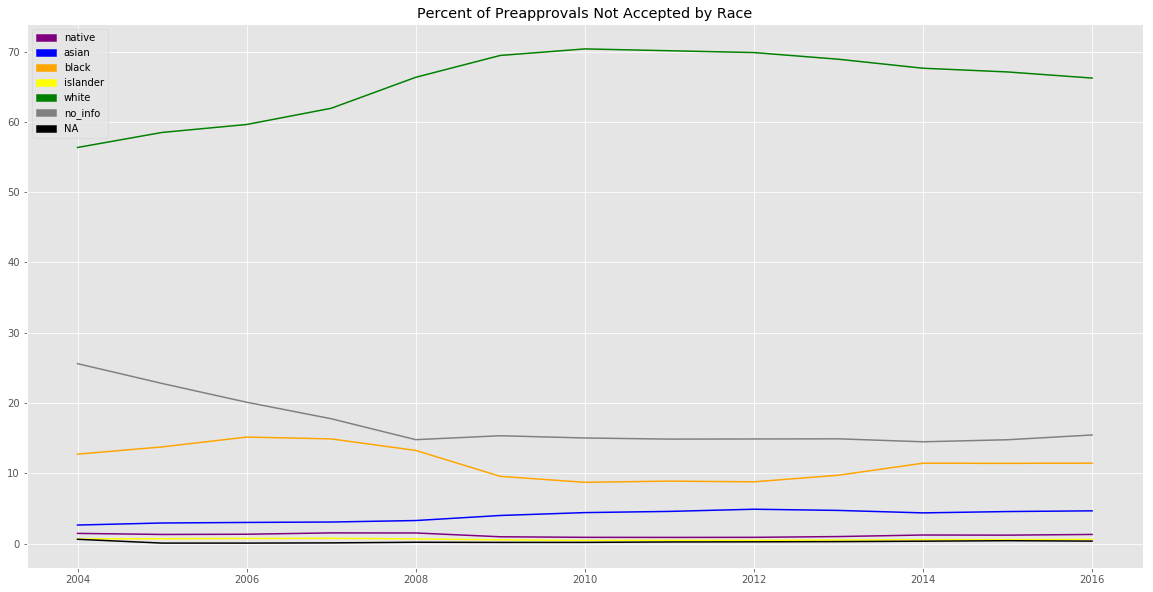

In [147]:
y_dict = {}
y_dict["native"] = action_race_df["native_pct"][action_race_df.action==3]
y_dict["asian"] = action_race_df["asian_pct"][action_race_df.action==3]
y_dict["black"] = action_race_df["black_pct"][action_race_df.action==3]
y_dict["islander"] = action_race_df["islander_pct"][action_race_df.action==3]
y_dict["white"] = action_race_df["white_pct"][action_race_df.action==3]
y_dict["no_info"] = action_race_df["no_info_pct"][action_race_df.action==3]
y_dict["NA"] = action_race_df["NA_pct"][action_race_df.action==3]
tabular_lines(y_dict, title="Percent of Preapprovals Not Accepted by Race")

In [201]:
#set multi index for summing and dividing in to power graphs
action_race_df.set_index(["year", "action"], inplace=True)

In [206]:
y_dict = {}
y_dict["native"] = round(action_race_df["native"].loc[,1] / action_race_df.native.loc[2004].sum(),2)
y_dict["asian"] = round(action_race_df["asian"][action_race_df.action==1] / action_race_df.asian.loc[2004].sum(),2)
y_dict["black"] = round(action_race_df["black"][action_race_df.action==1] / action_race_df.black.loc[2004].sum(),2)
y_dict["islander"] = round(action_race_df["islander"][action_race_df.action==1] / action_race_df.islander.loc[2004].sum(),2)
y_dict["white"] = round(action_race_df["white"][action_race_df.action==1] / action_race_df.white.loc[2004].sum(),2)
y_dict["no_info"] = round(action_race_df["no_info"][action_race_df.action==1] / action_race_df.no_info.loc[2004].sum(),2)
y_dict["NA"] = round(action_race_df["NA"][action_race_df.action==1] / action_race_df.NA.loc[2004].sum(),2)
tabular_lines(y_dict, title="Approval Rate by Race")

SyntaxError: invalid syntax (<ipython-input-206-b4477cb8c87a>, line 2)

In [212]:

action_race_df.native.groupby(action_race_df.year).sum()
#.set_index(['date', 'language'], inplace=True)

AttributeError: 'DataFrame' object has no attribute 'year'

In [221]:
type(action_race_df[["native", "asian", "black", "islander", "white", "no_info", "NA"]].loc[2004].sum())

pandas.core.series.Series

In [222]:
#get all year sums in DF
#map division of action by correct year total to get action pct by race (ie approval rate)
action_race_df.index.levels[0]
race_year_totals = []
for year in action_race_df.index.levels[0]:
    race_year_totals.append(
        action_race_df[["native", "asian", "black", "islander", "white", "no_info", "NA"]].loc[year].sum())
race_totals = pd.DataFrame(race_year_totals)
race_totals.set_index(np.arange(2004,2017), inplace=True)
race_totals

,native,asian,black,islander,white,no_info,NA
2004,328084,1133243,2764040,196331,20351133,5904047,2953596
2005,343006,1243237,3263277,218775,22461104,5977704,2950133
2006,277430,1100355,3296935,211957,20238822,5211391,3818470
2007,229957,896763,2471941,145498,16964653,3682725,2310555
2008,142367,633542,1410143,84438,11899321,2048859,1312570
2009,110059,782528,1043310,70977,13412761,2034729,2120128
2010,89554,788582,841433,55955,11922097,1819562,1234797
2011,76029,708563,744378,49773,10305542,1564033,1458128
2012,93441,967696,900103,63724,13246609,1975712,1504776
2013,97409,828136,936952,62052,11789649,1780855,1518284


In [276]:
action_pct_df = action_race_df[["native", "asian", "black", "islander", "white", "no_info", "NA"]].copy()
action_pct_df.index[0]
#divide action_pct_df by race_totals
action_pct_df.native.loc[2004] / race_totals.native.loc[2004]
native_rows = []
asian_rows = []
black_rows = []
islander_rows = []
white_rows = []
no_info_rows = []
na_rows = []
for year in race_totals.index:
    native_rows.append(round((action_pct_df.native.loc[year] / race_totals.native.loc[year] *100), 2))
    asian_rows.append(round((action_pct_df.asian.loc[year]/race_totals.asian.loc[year]*100),2))
    black_rows.append(round((action_pct_df.black.loc[year]/race_totals.black.loc[year]*100),2))
    islander_rows.append(round((action_pct_df.islander.loc[year]/race_totals.islander.loc[year]*100),2))
    white_rows.append(round((action_pct_df.white.loc[year]/race_totals.white.loc[year]*100),2))
    no_info_rows.append(round((action_pct_df.no_info.loc[year]/race_totals.no_info.loc[year]*100),2))
    na_rows.append(round((action_pct_df.NA.loc[year]/race_totals.NA.loc[year]*100),2))
native_df = pd.DataFrame(native_rows, index=np.arange(2004,2017))
asian_df = pd.DataFrame(asian_rows, index=np.arange(2004,2017))
black_df = pd.DataFrame(black_rows, index=np.arange(2004,2017))
islander_df = pd.DataFrame(islander_rows, index=np.arange(2004,2017))
white_df = pd.DataFrame(white_rows, index=np.arange(2004,2017))
no_info_df = pd.DataFrame(no_info_rows, index=np.arange(2004,2017))
na_df = pd.DataFrame(na_rows, index=np.arange(2004,2017))


In [299]:
approval_df = pd.concat([native_df[1], asian_df[1], black_df[1], islander_df[1], white_df[1], no_info_df[1], na_df[1]], 
            axis=1)
not_accepted_df = pd.concat([native_df[2], asian_df[2], black_df[2], islander_df[2], white_df[2], no_info_df[2], na_df[2]], 
            axis=1)
denied_df = pd.concat([native_df[3], asian_df[3], black_df[3], islander_df[3], white_df[3], no_info_df[3], na_df[3]], 
            axis=1)
withdraw_df = pd.concat([native_df[4], asian_df[4], black_df[4], islander_df[4], white_df[4], no_info_df[4], na_df[4]], 
            axis=1)
incomplete_df = pd.concat([native_df[5], asian_df[5], black_df[5], islander_df[5], white_df[5], no_info_df[5], na_df[5]], 
            axis=1)
purchase_df = pd.concat([native_df[6], asian_df[6], black_df[6], islander_df[6], white_df[6], no_info_df[6], na_df[6]], 
            axis=1)
pre_deny_df = pd.concat([native_df[7], asian_df[7], black_df[7], islander_df[7], white_df[7], no_info_df[7], na_df[7]], 
            axis=1)
pre_approve_df = pd.concat([native_df[8], asian_df[8], black_df[8], islander_df[8], white_df[8], no_info_df[8], na_df[8]], 
            axis=1)
approval_df.columns =["native", "asian", "black", "islander", "white", "no_info", "na"]
not_accepted_df.columns =["native", "asian", "black", "islander", "white", "no_info", "na"]
denied_df.columns =["native", "asian", "black", "islander", "white", "no_info", "na"]
withdraw_df.columns =["native", "asian", "black", "islander", "white", "no_info", "na"]
incomplete_df.columns =["native", "asian", "black", "islander", "white", "no_info", "na"]
purchase_df.columns =["native", "asian", "black", "islander", "white", "no_info", "na"]
pre_deny_df.columns =["native", "asian", "black", "islander", "white", "no_info", "na"]
pre_approve_df.columns =["native", "asian", "black", "islander", "white", "no_info", "na"]


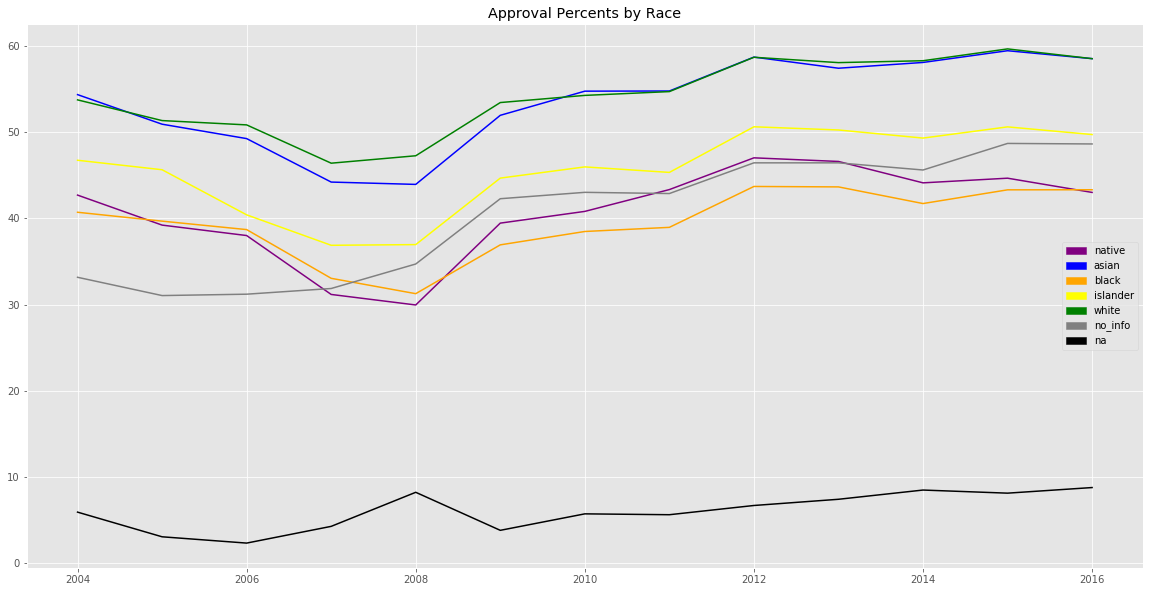

In [300]:
line_graph(approval_df, title="Approval Percents by Race")

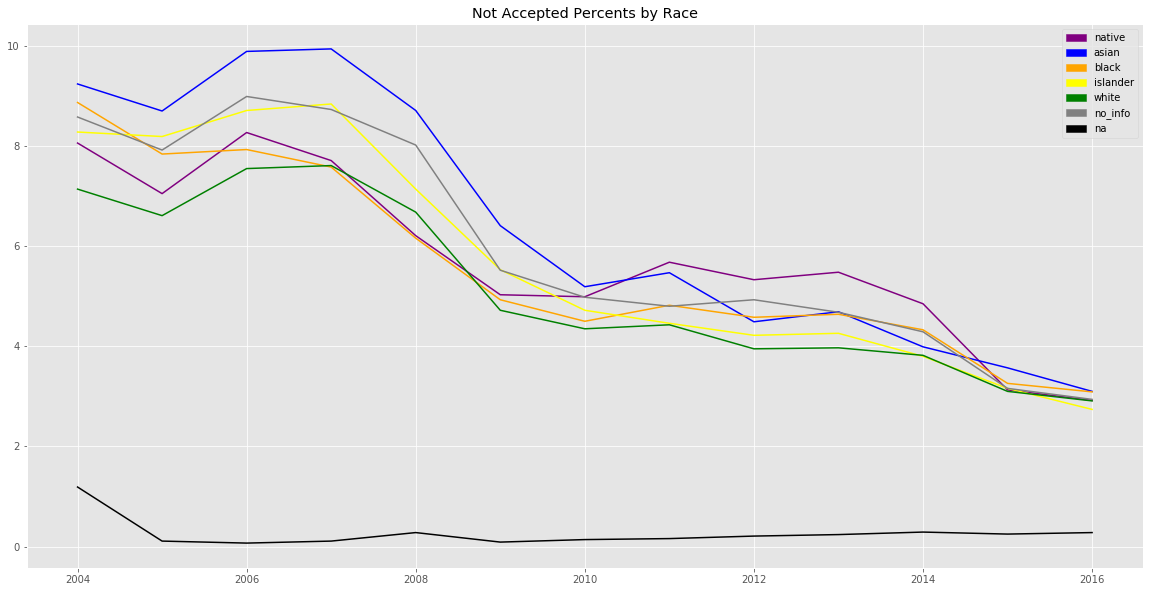

In [301]:
line_graph(not_accepted_df, title="Not Accepted Percents by Race")

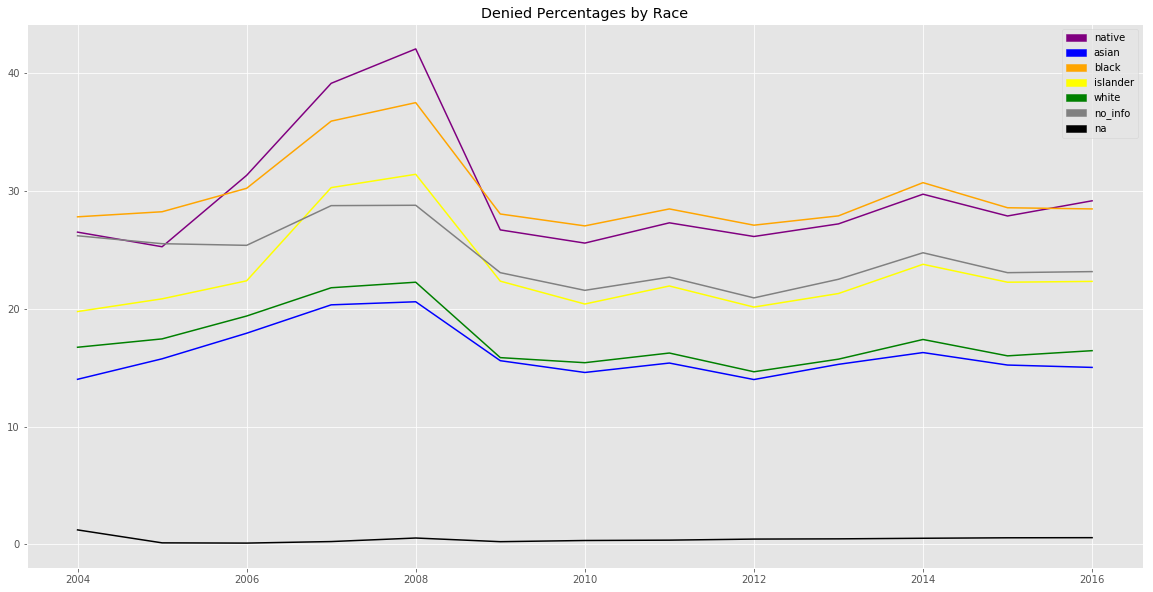

In [302]:
line_graph(denied_df, title="Denied Percentages by Race")

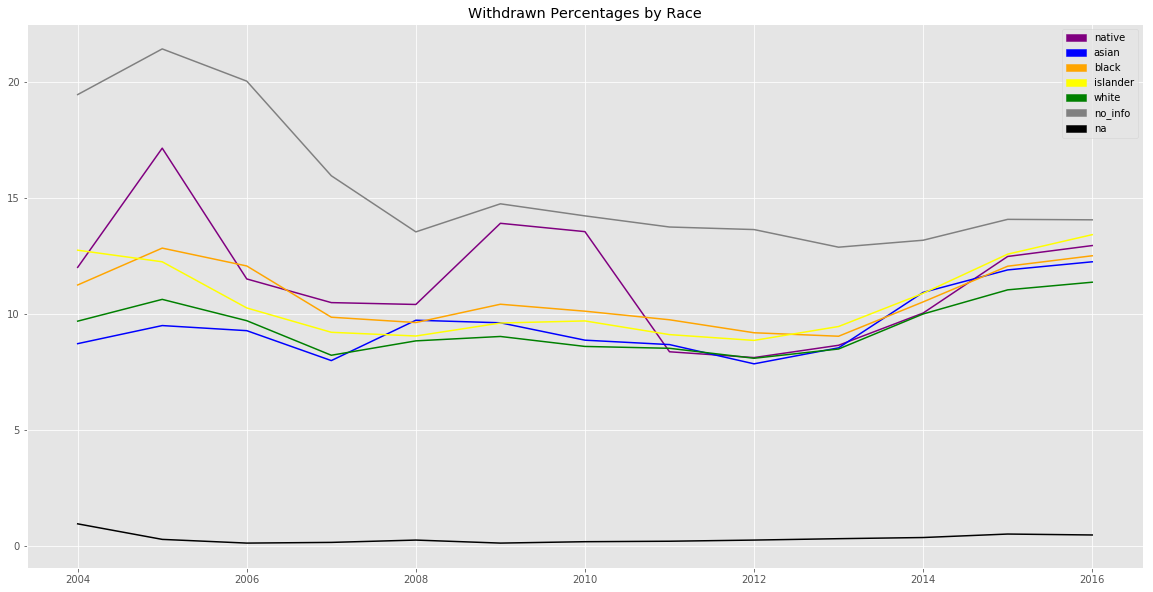

In [303]:
line_graph(withdraw_df, title="Withdrawn Percentages by Race")

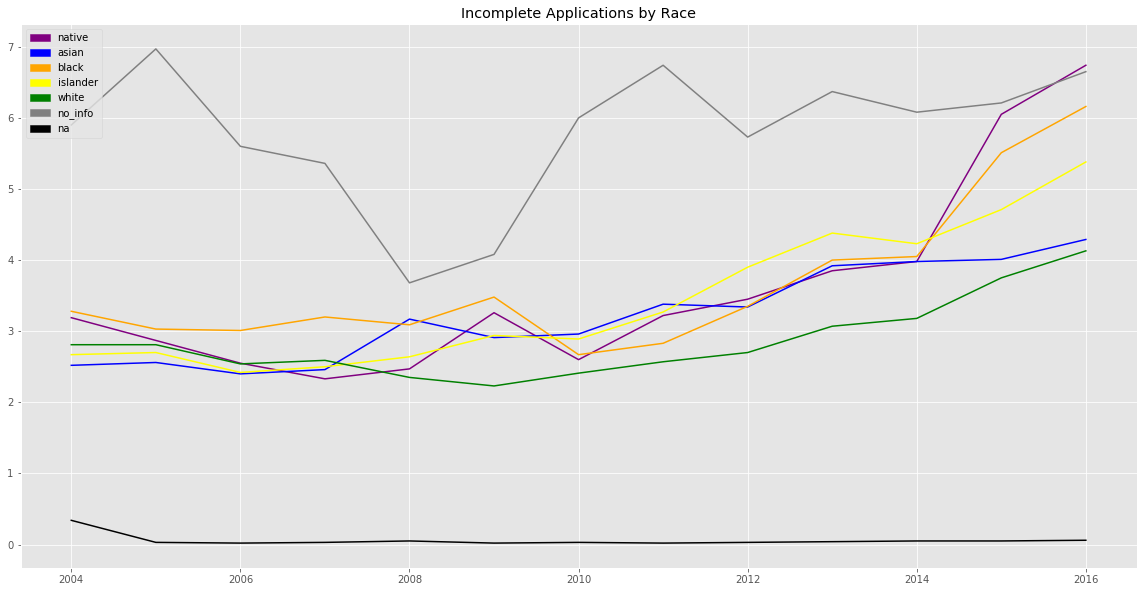

In [304]:
line_graph(incomplete_df, title="Incomplete Applications by Race")

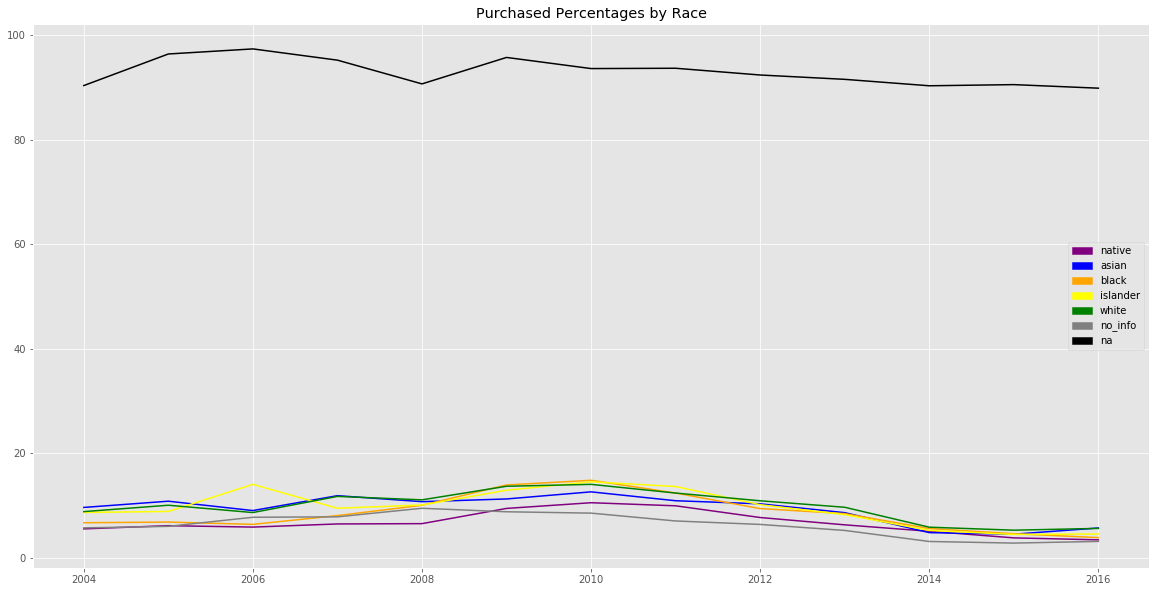

In [305]:
line_graph(purchase_df, title="Purchased Percentages by Race")

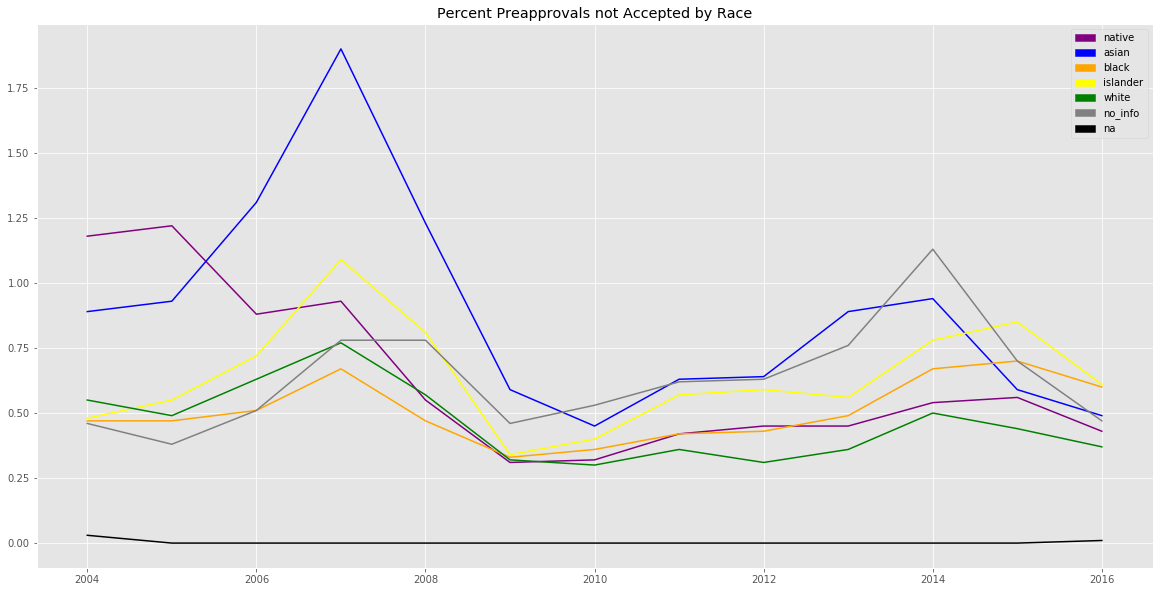

In [307]:
line_graph(pre_approve_df, title="Percent Preapprovals not Accepted by Race")

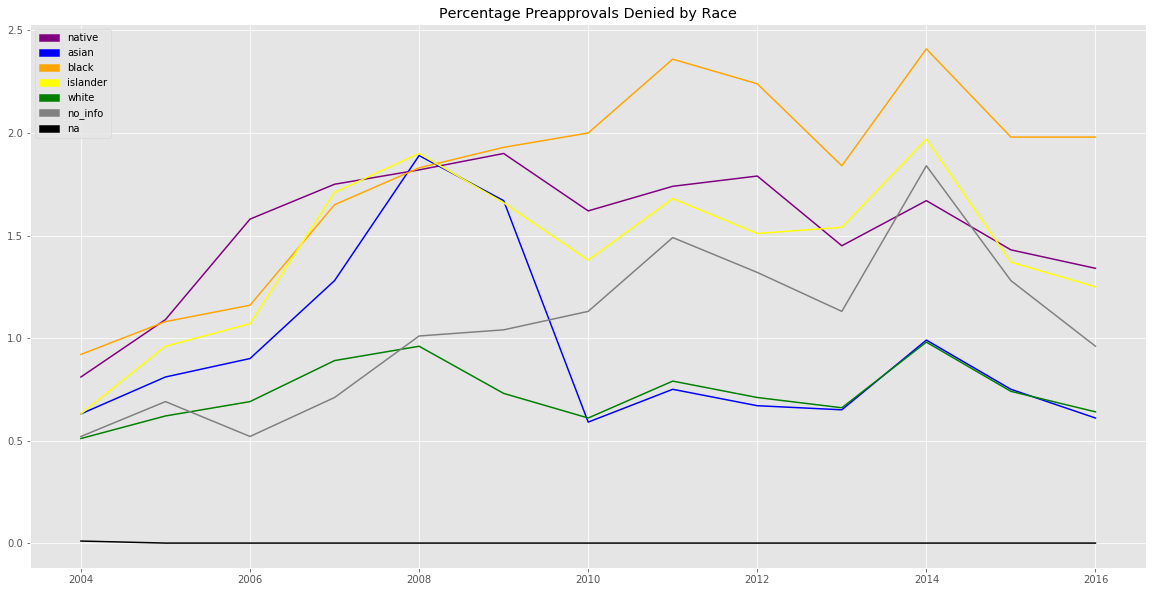

In [308]:
line_graph(pre_deny_df, title="Percentage Preapprovals Denied by Race")

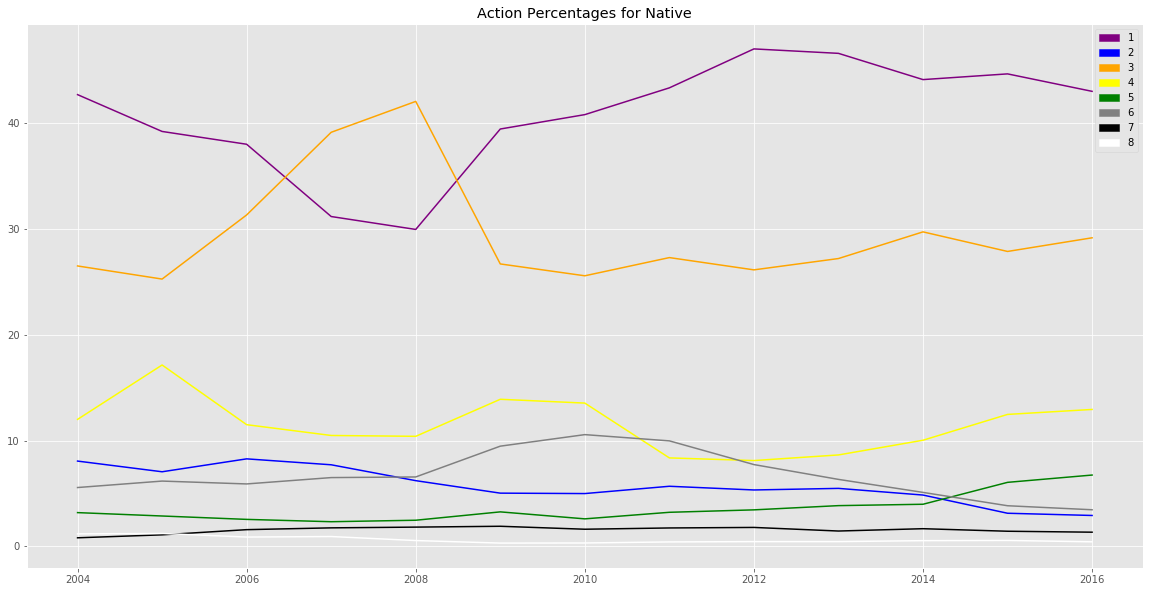

In [278]:
line_graph(native_df, title="Action Percentages for Native")

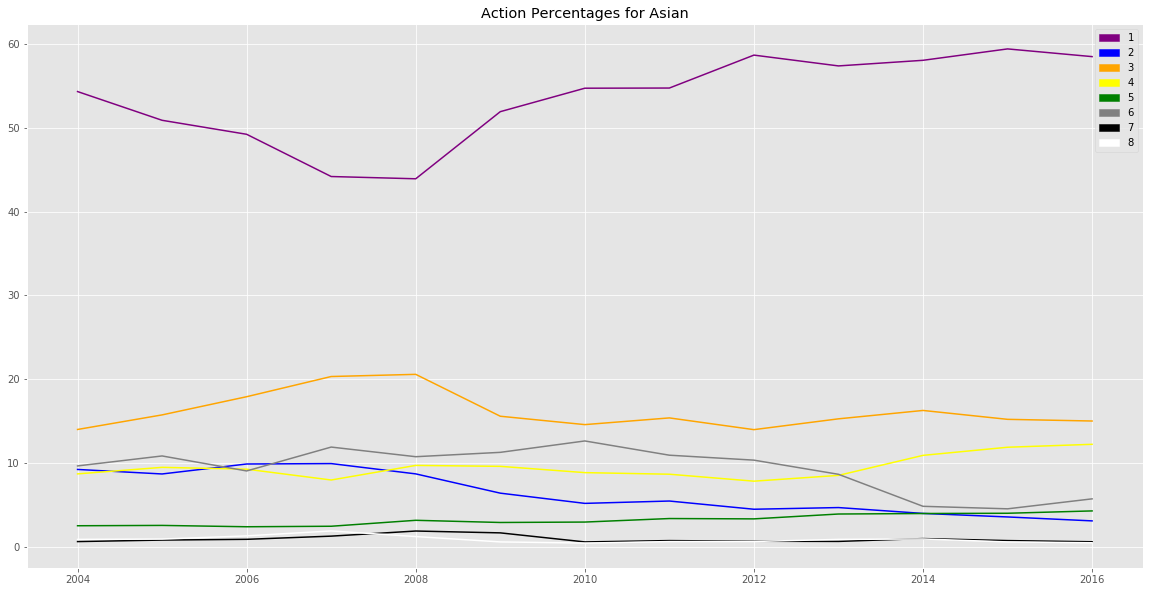

In [309]:
line_graph(asian_df, title="Action Percentages for Asian")

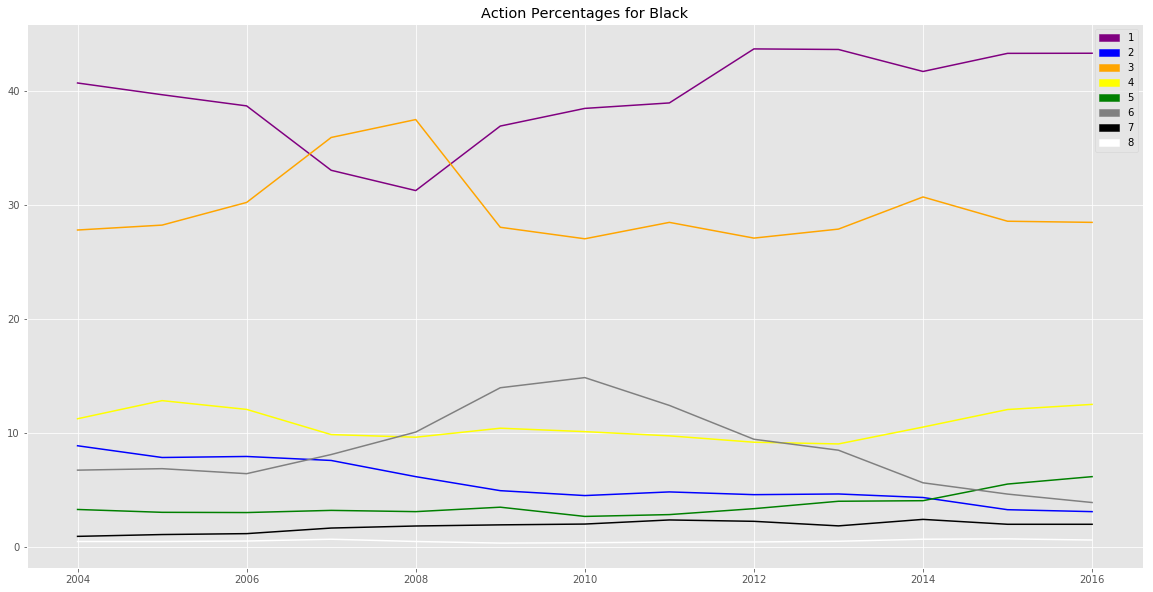

In [310]:
line_graph(black_df, title="Action Percentages for Black")

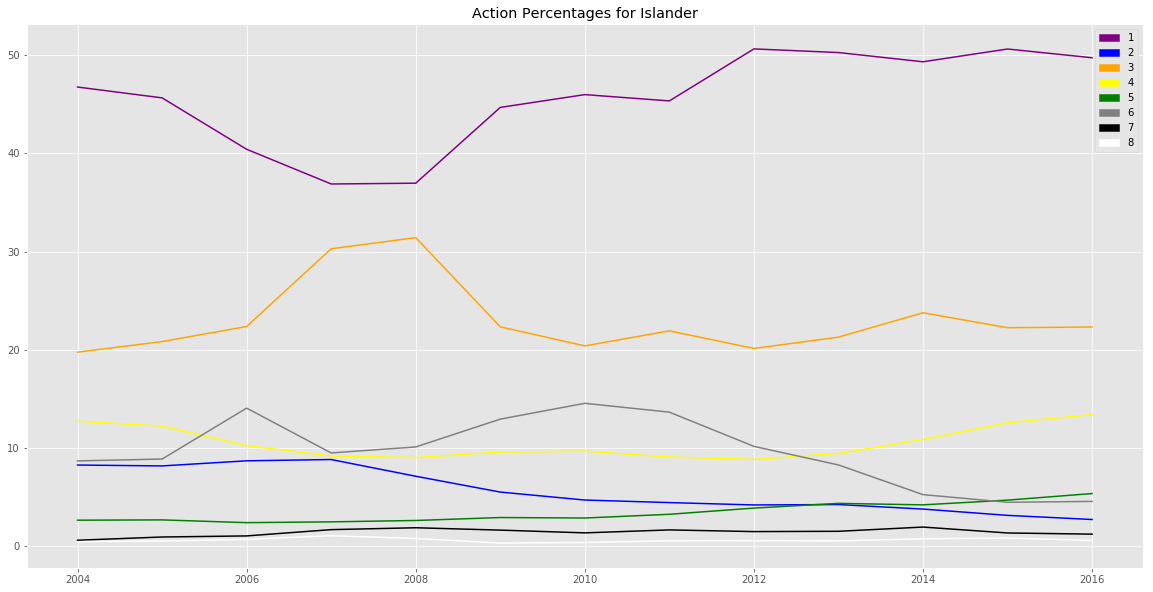

In [311]:
line_graph(islander_df, title="Action Percentages for Islander")

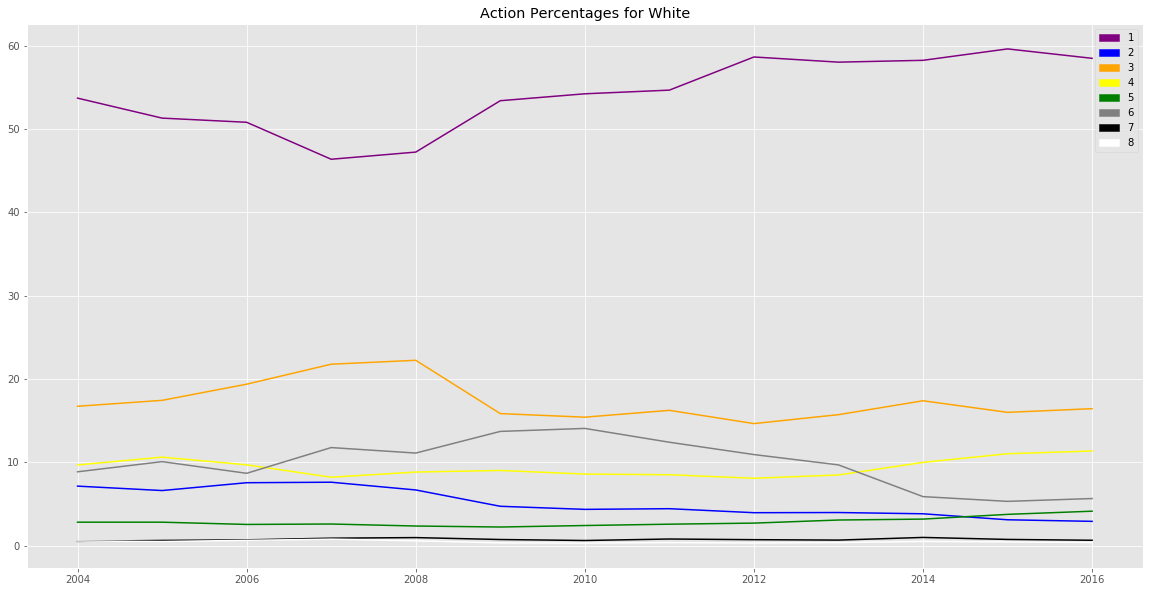

In [312]:
line_graph(white_df, title="Action Percentages for White")

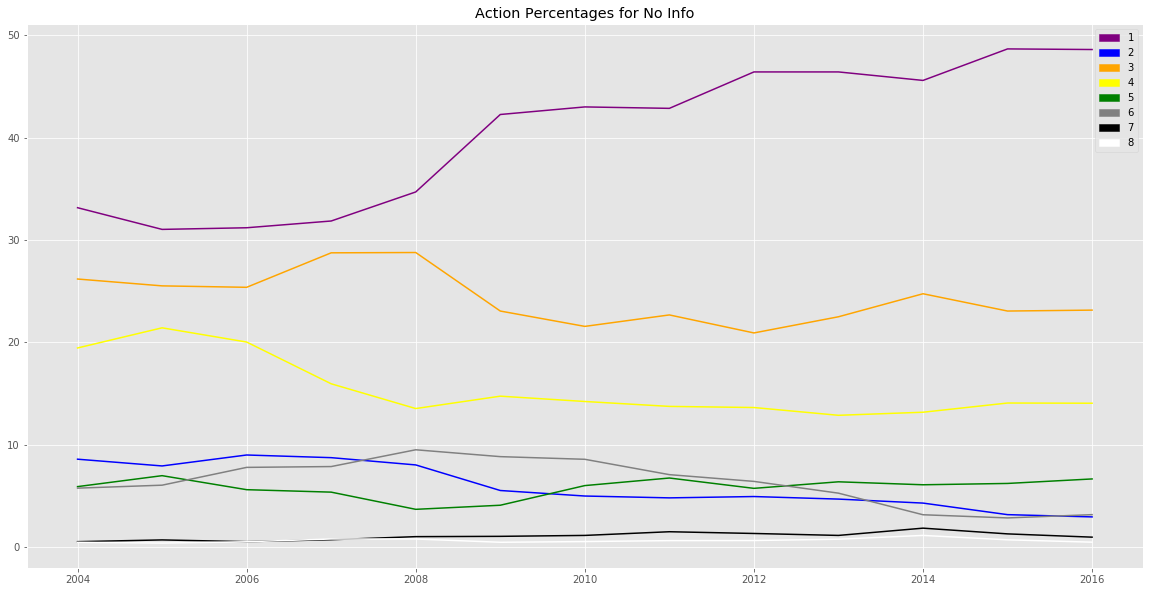

In [313]:
line_graph(no_info_df, title="Action Percentages for No Info")


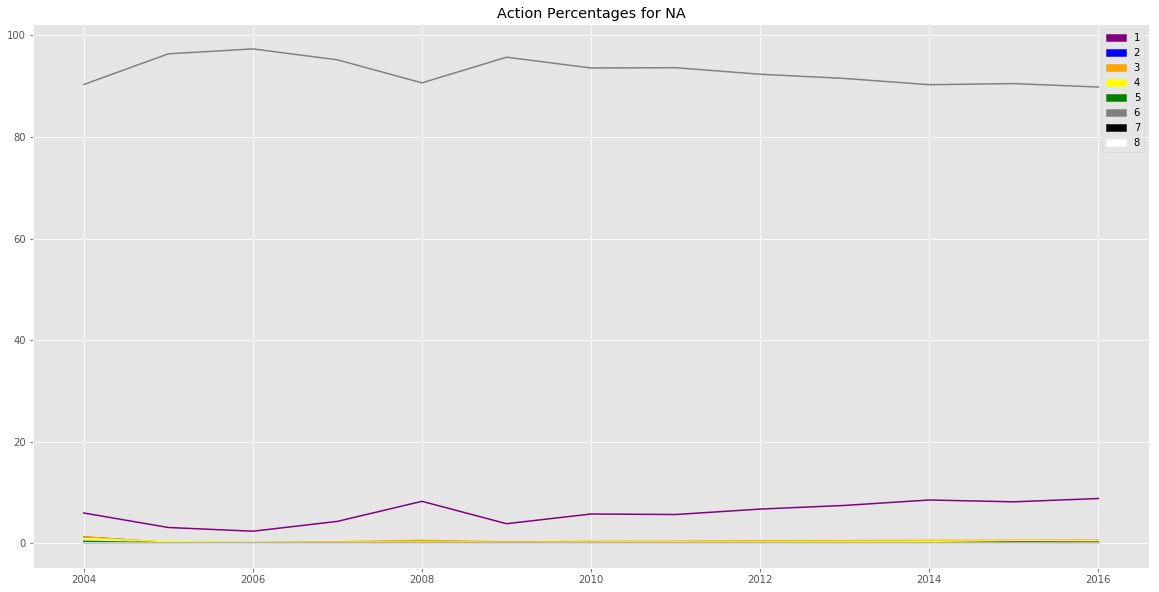

In [314]:
line_graph(na_df, title="Action Percentages for NA")